In [11]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)
library(ggtree)

# read the database
db <- read_airr("/home/phil/processed_docker/a_docker/changeo_10x/a_filtered_contig_heavy_germ-pass.tsv")

ggtree v2.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
- Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36. doi:10.1111/2041-210X.12628





In [12]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 37 x 4
   clone_id  data       locus  seqs
   <chr>     <list>     <chr> <int>
 1 1412_25   <airrClon> IGH      10
 2 788_325   <airrClon> IGH      10
 3 709_115   <airrClon> IGH       5
 4 733_678   <airrClon> IGH       5
 5 1307_1540 <airrClon> IGH       4
 6 783_998   <airrClon> IGH       4
 7 1453_276  <airrClon> IGH       3
 8 706_752   <airrClon> IGH       3
 9 1035_804  <airrClon> IGH       2
10 1048_1873 <airrClon> IGH       2
# … with 27 more rows


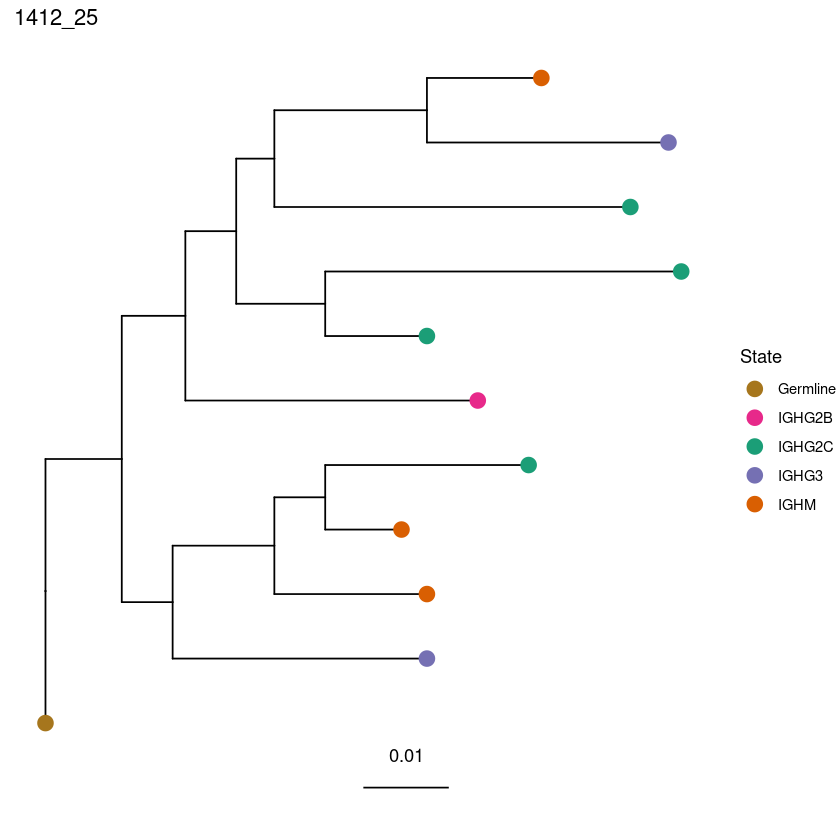

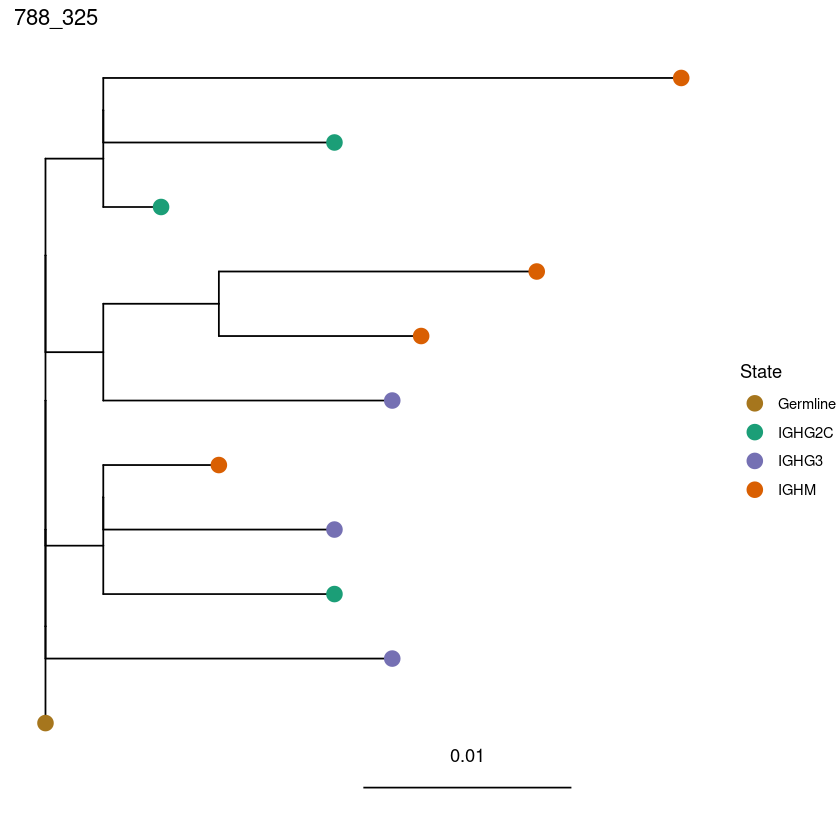

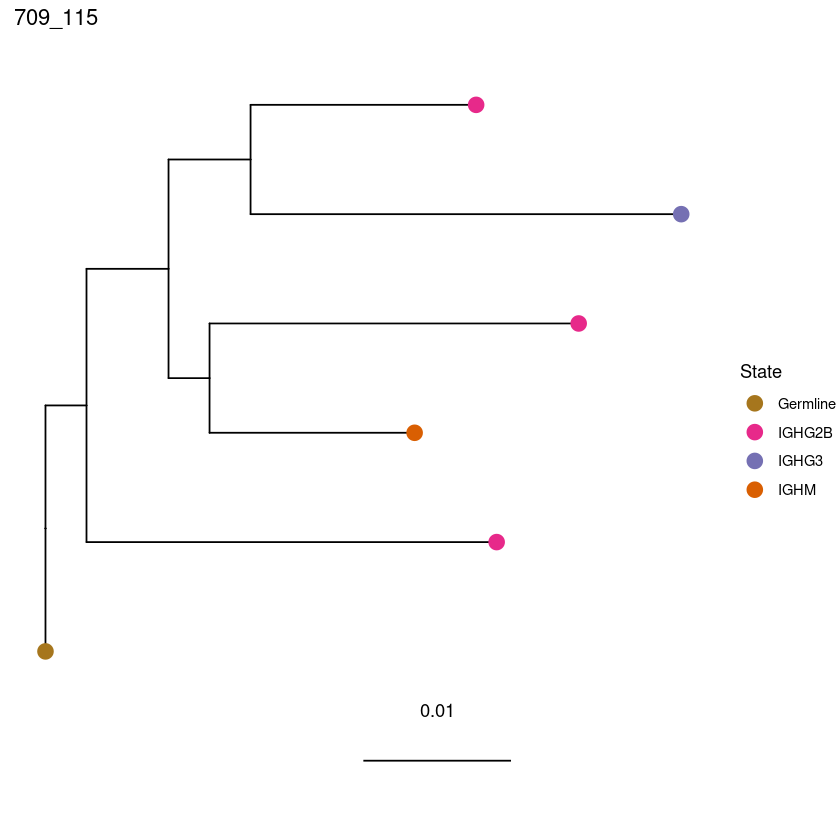

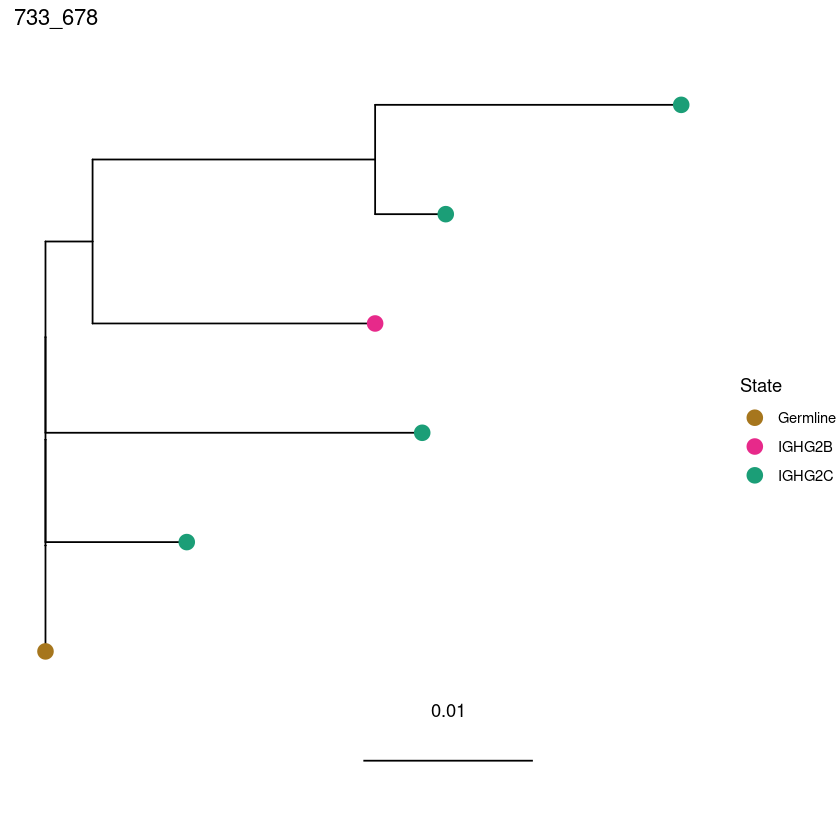

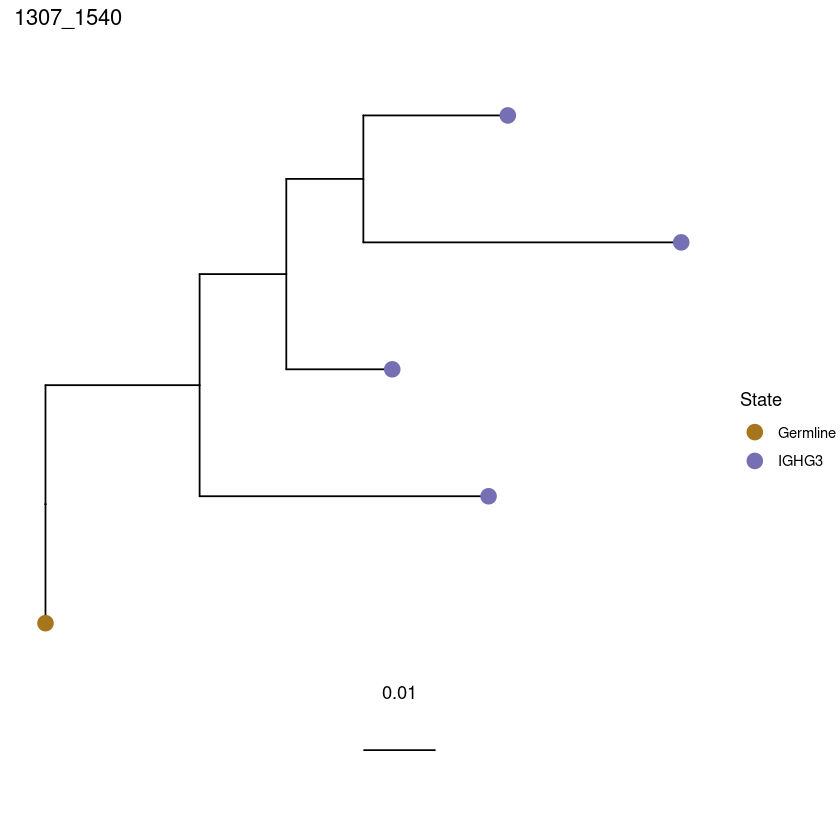

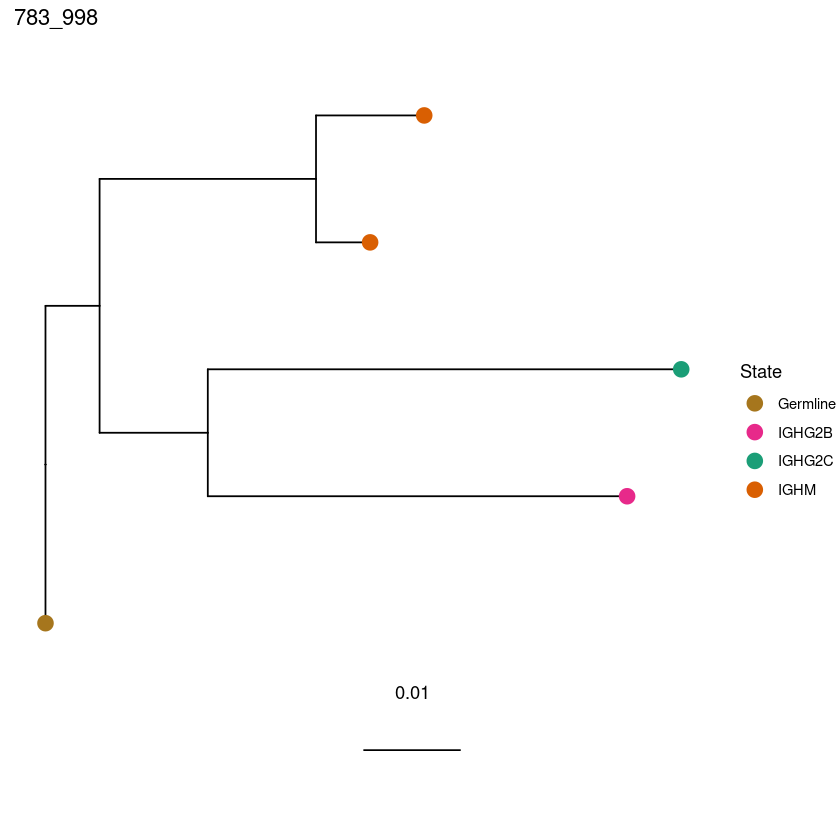

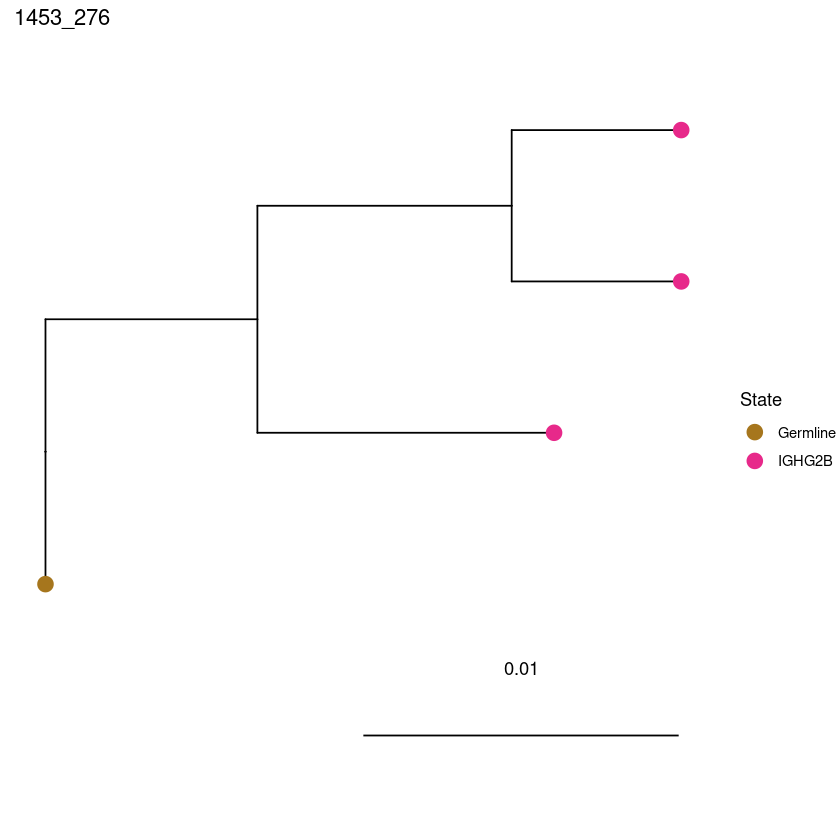

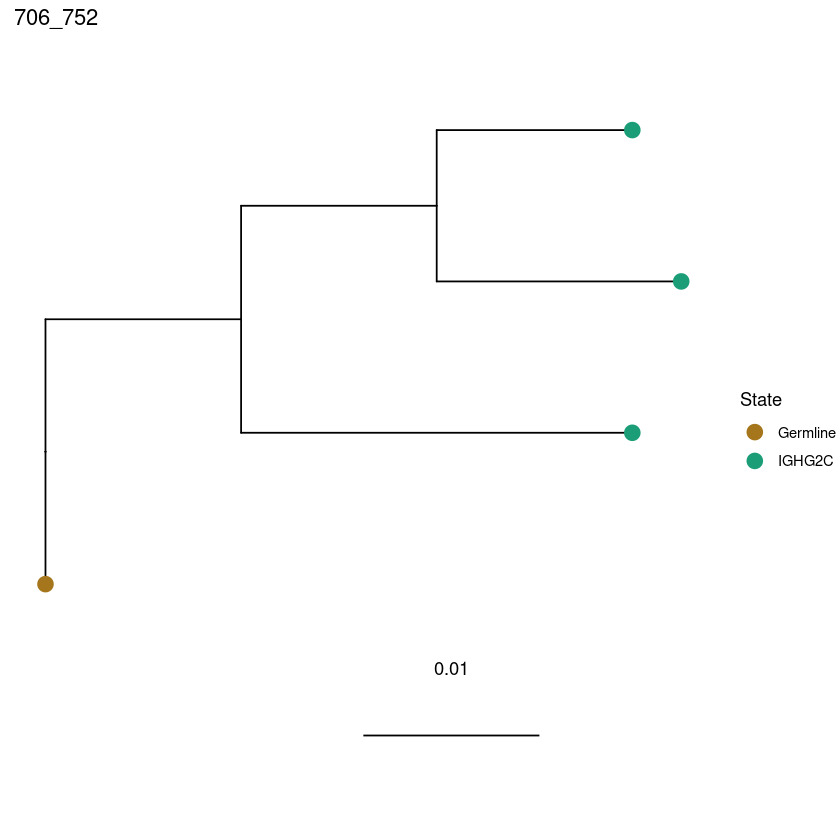

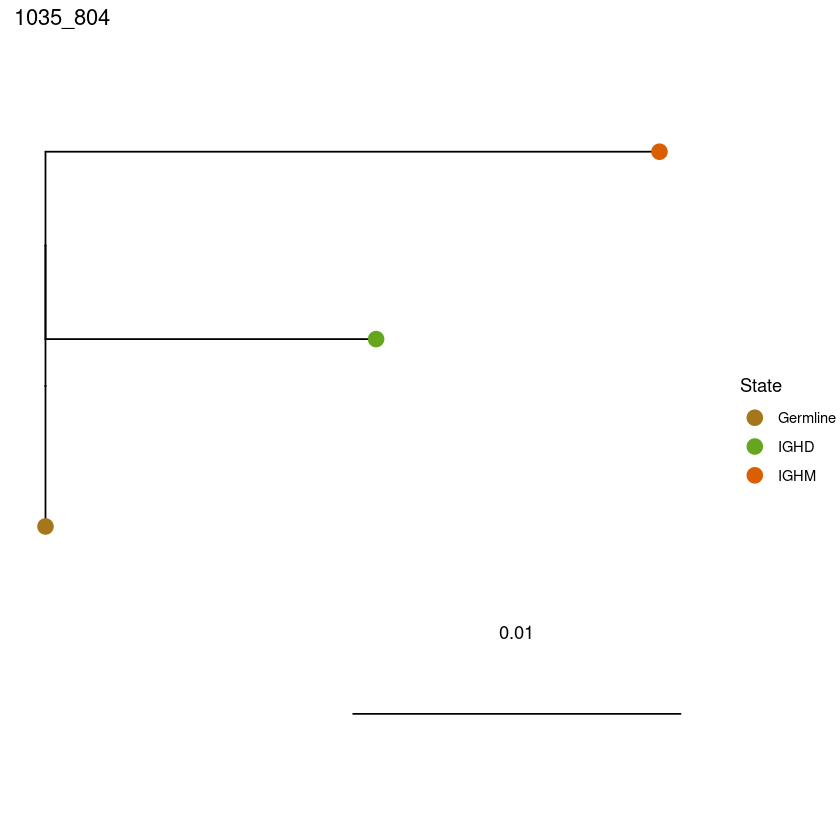

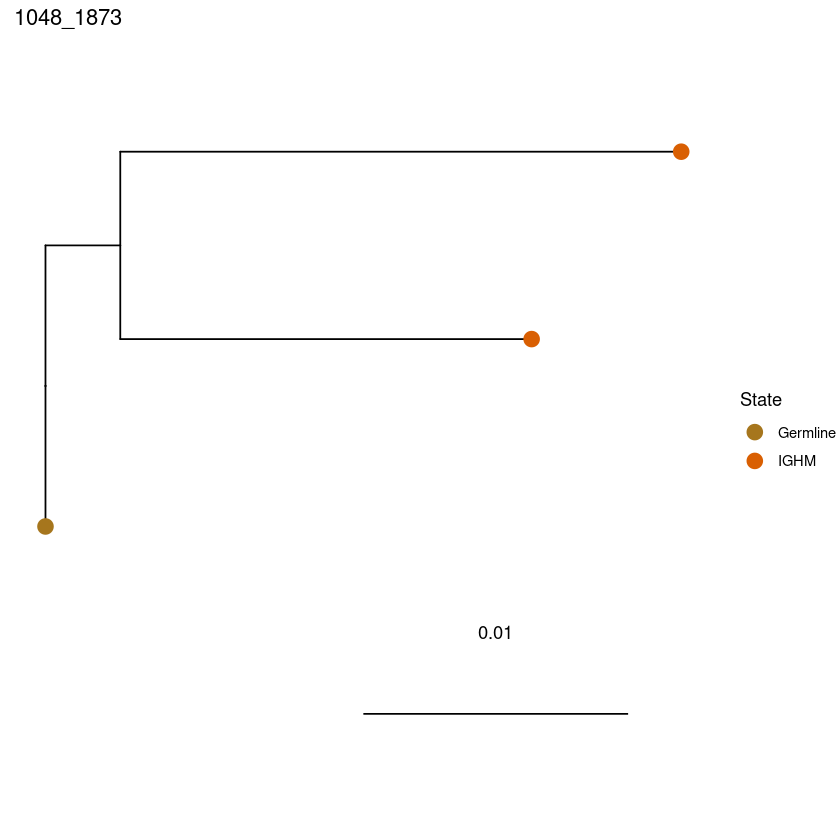

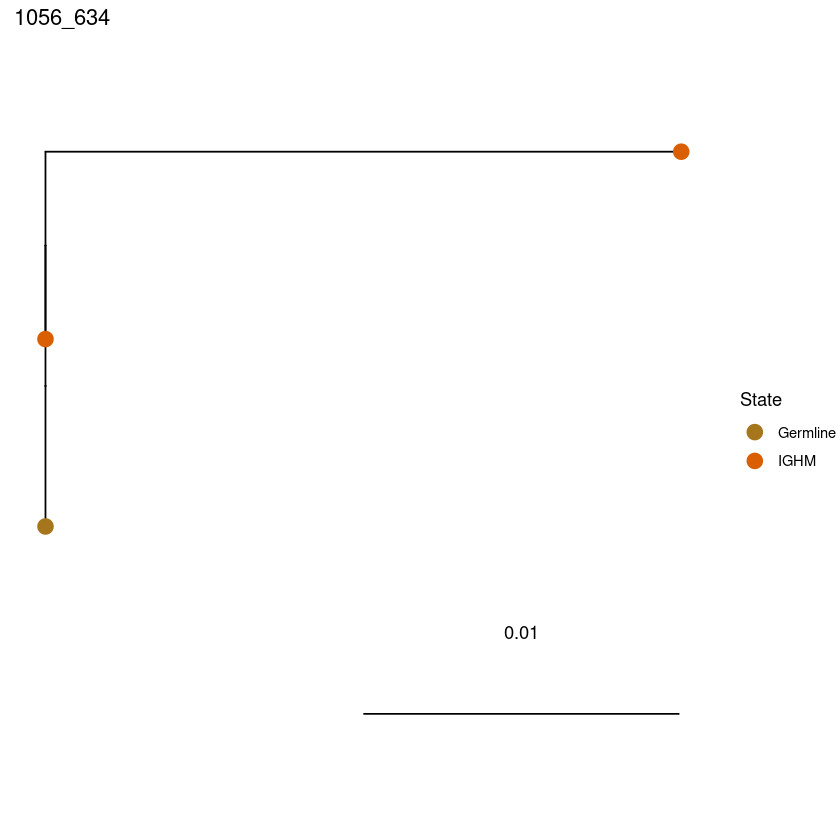

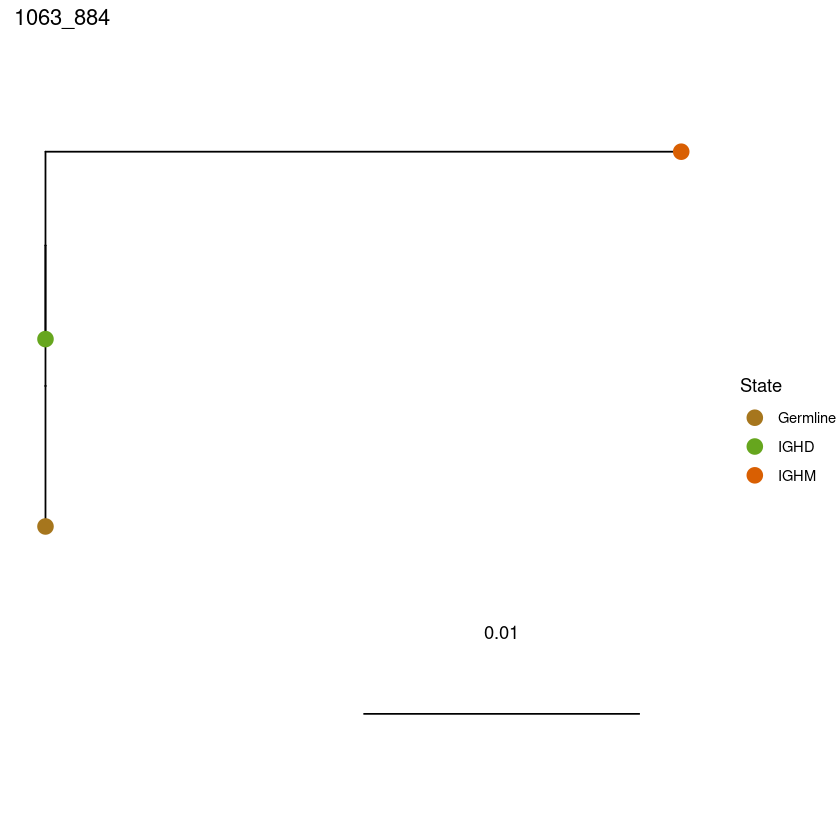

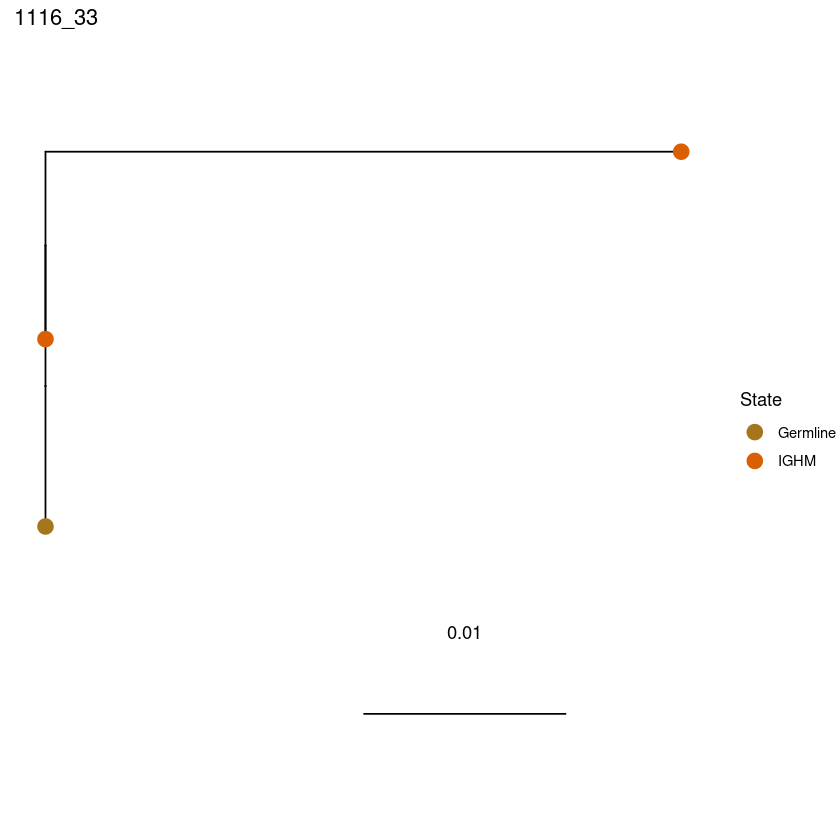

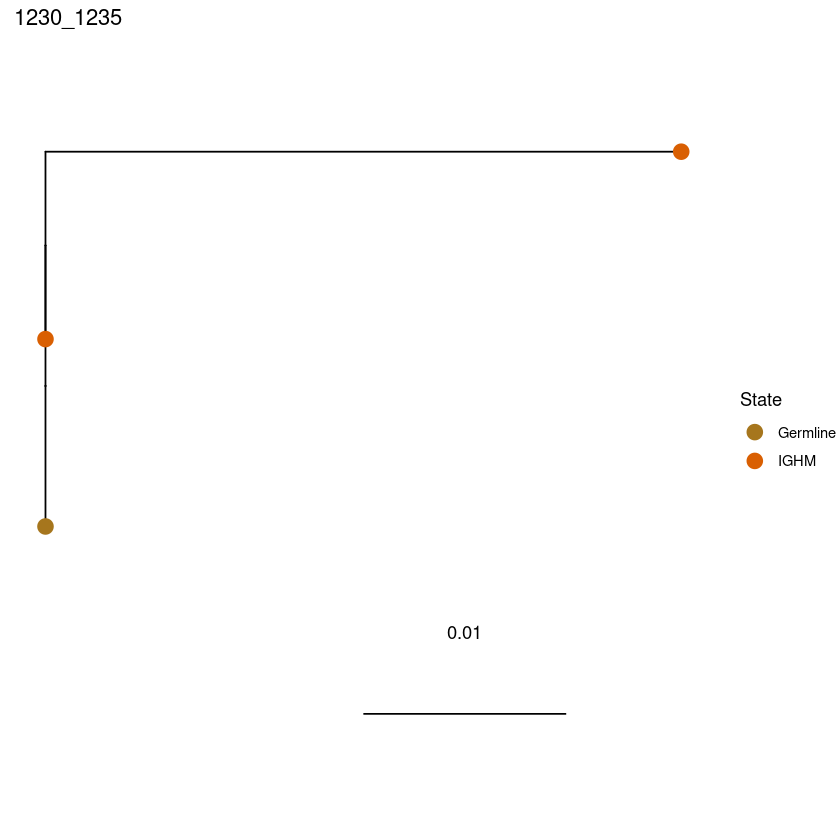

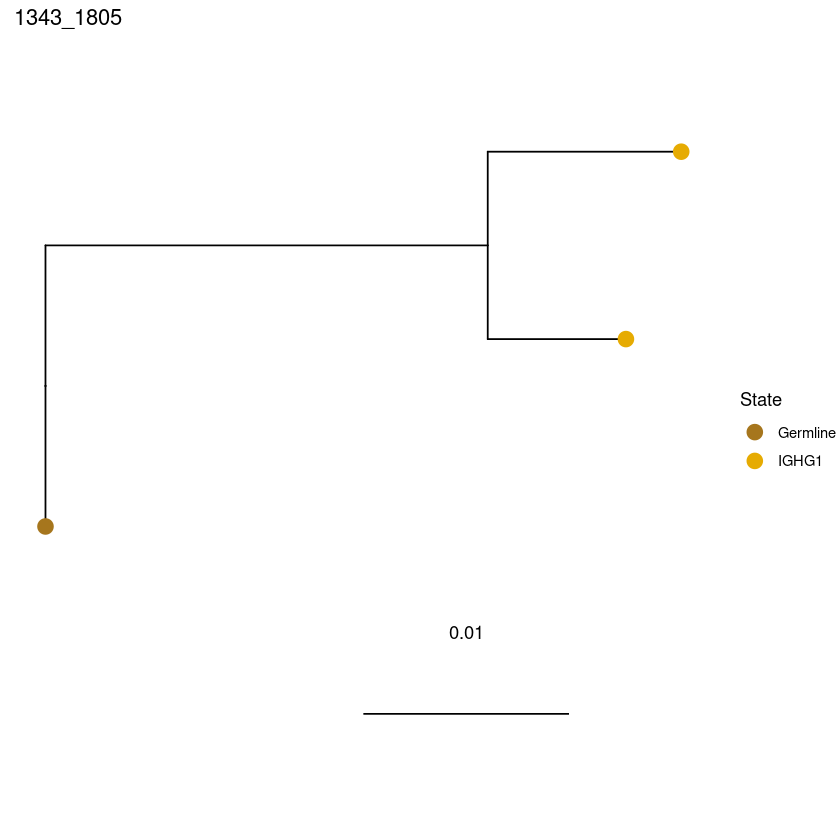

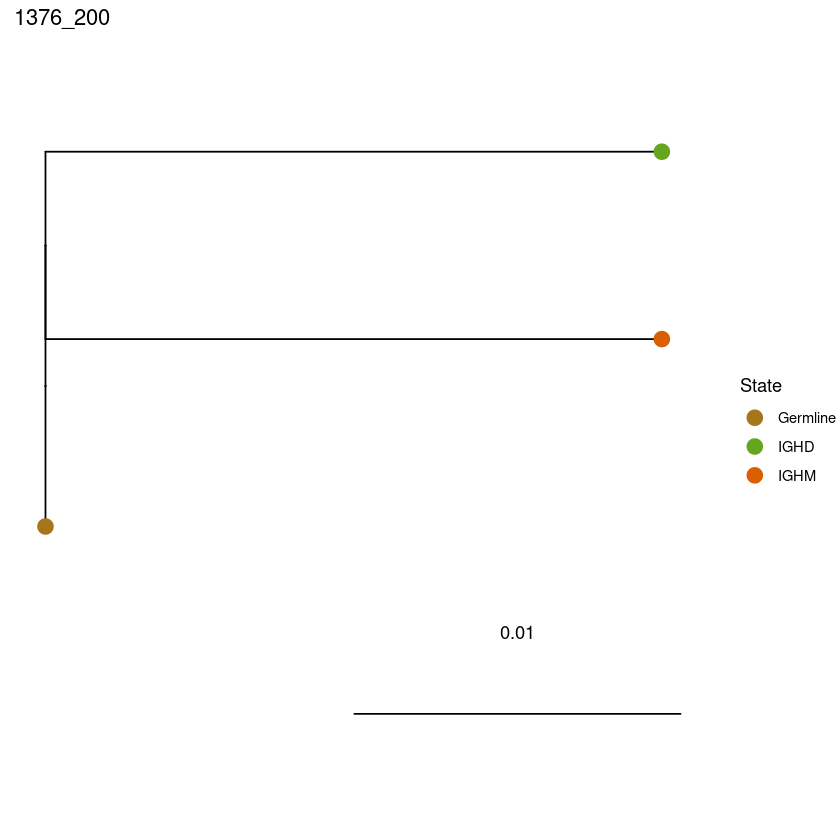

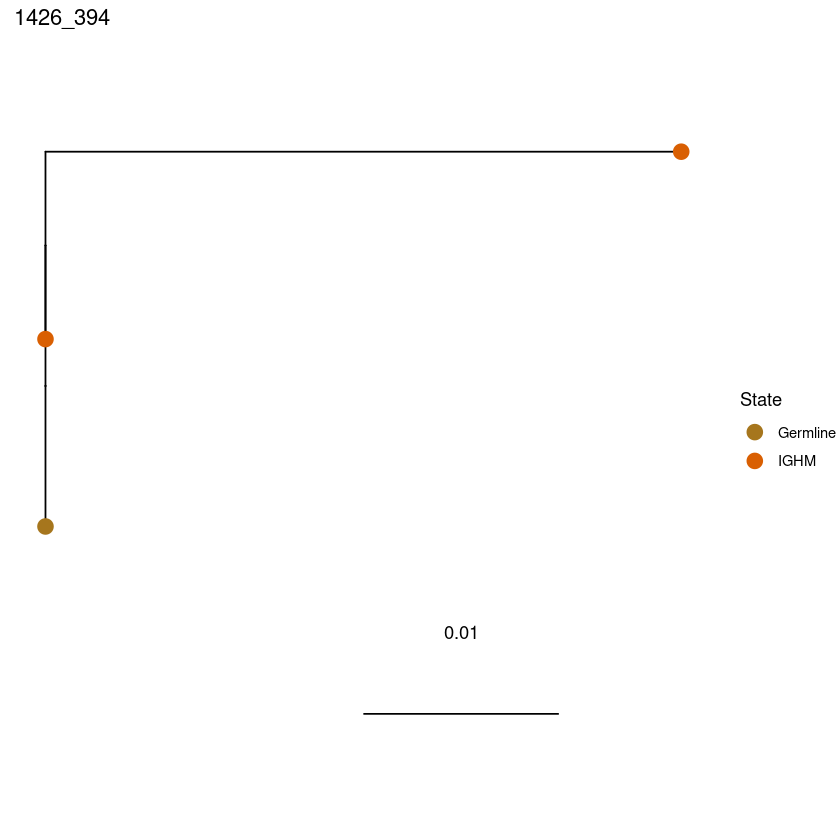

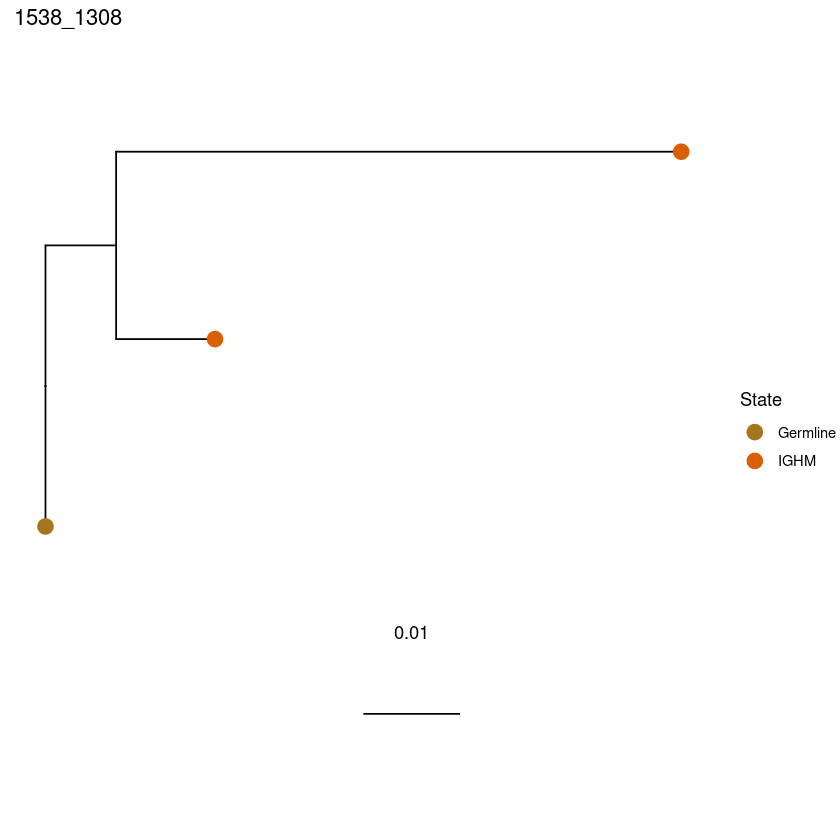

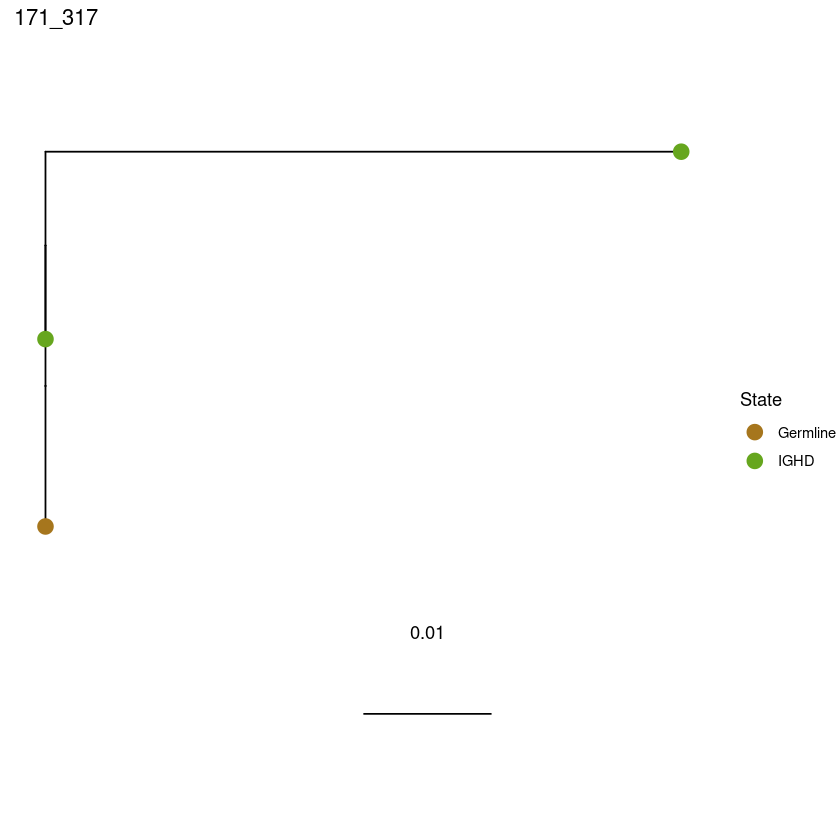

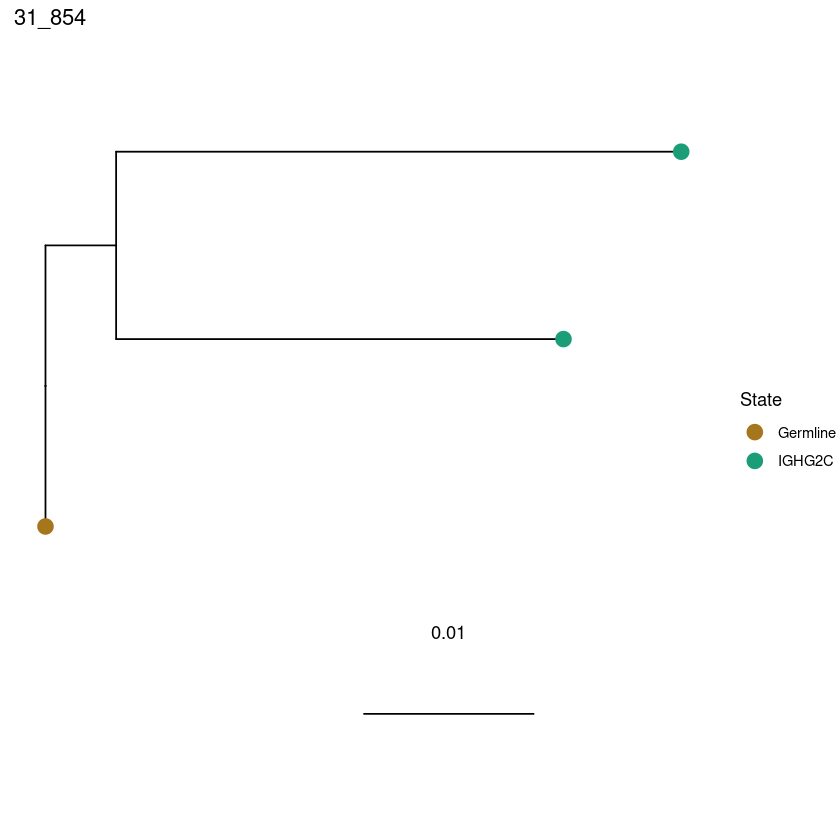

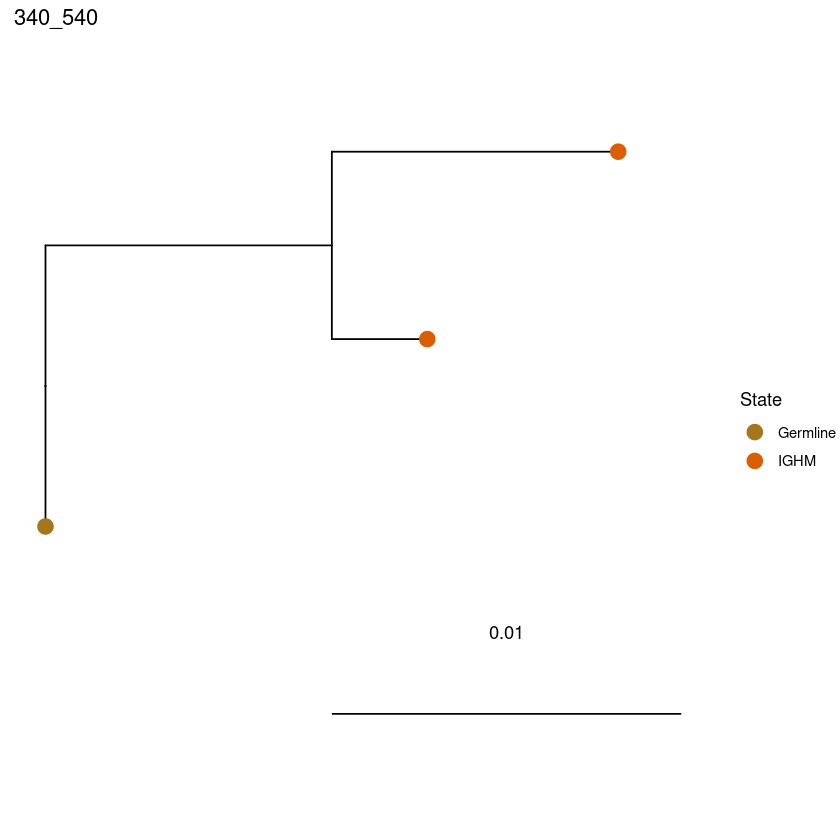

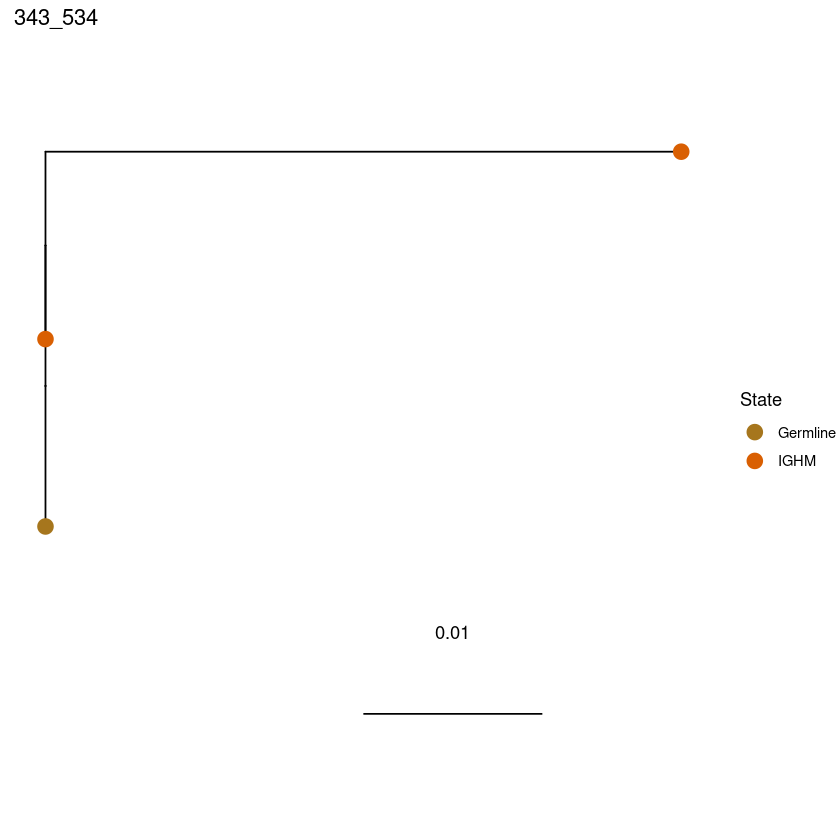

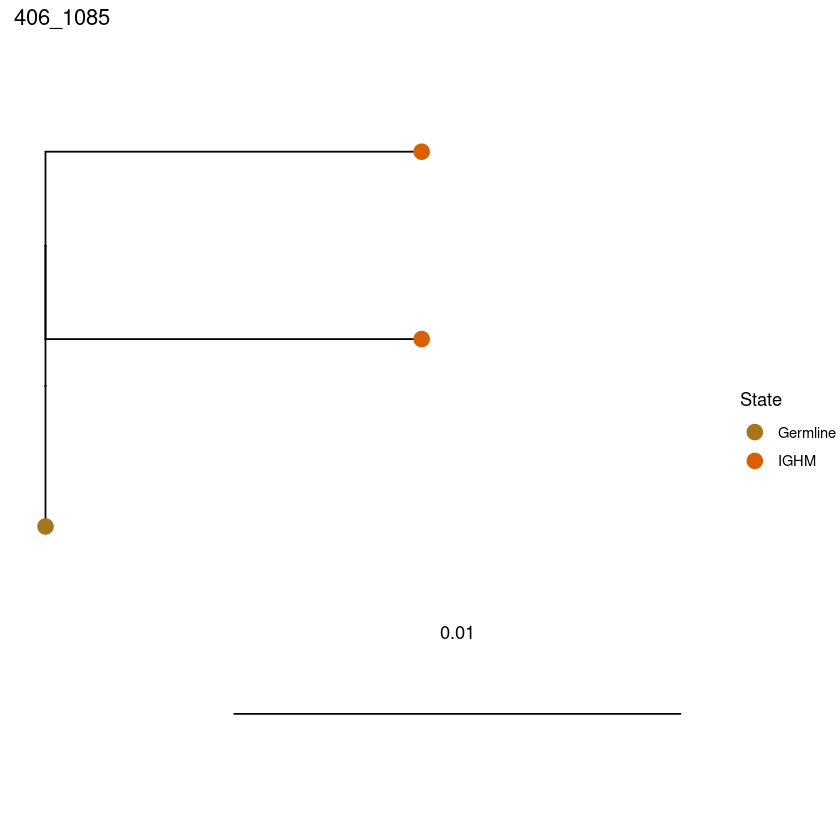

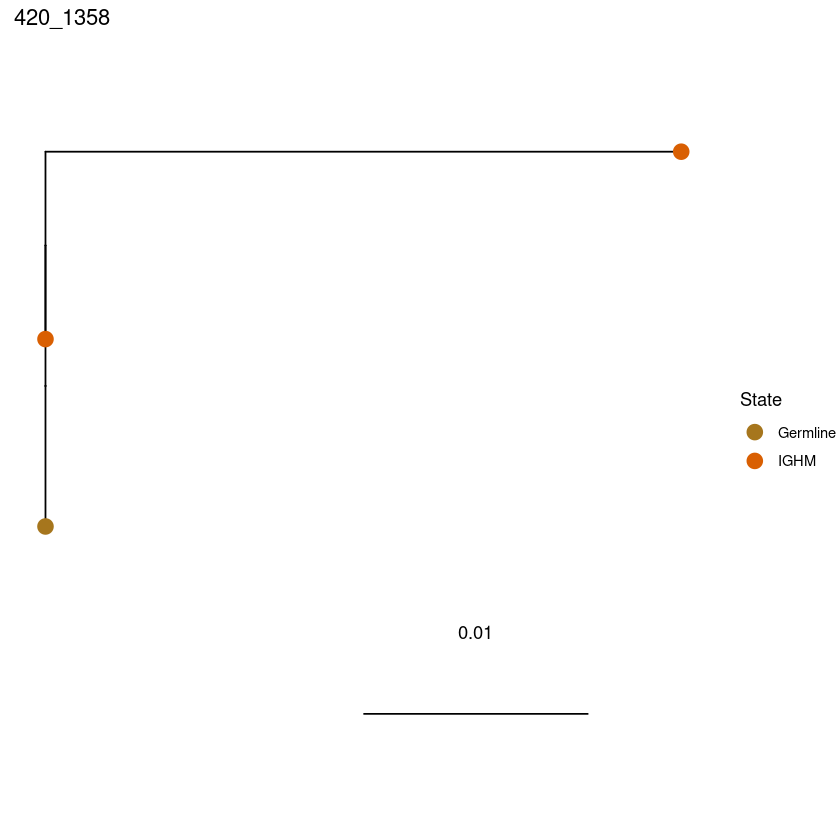

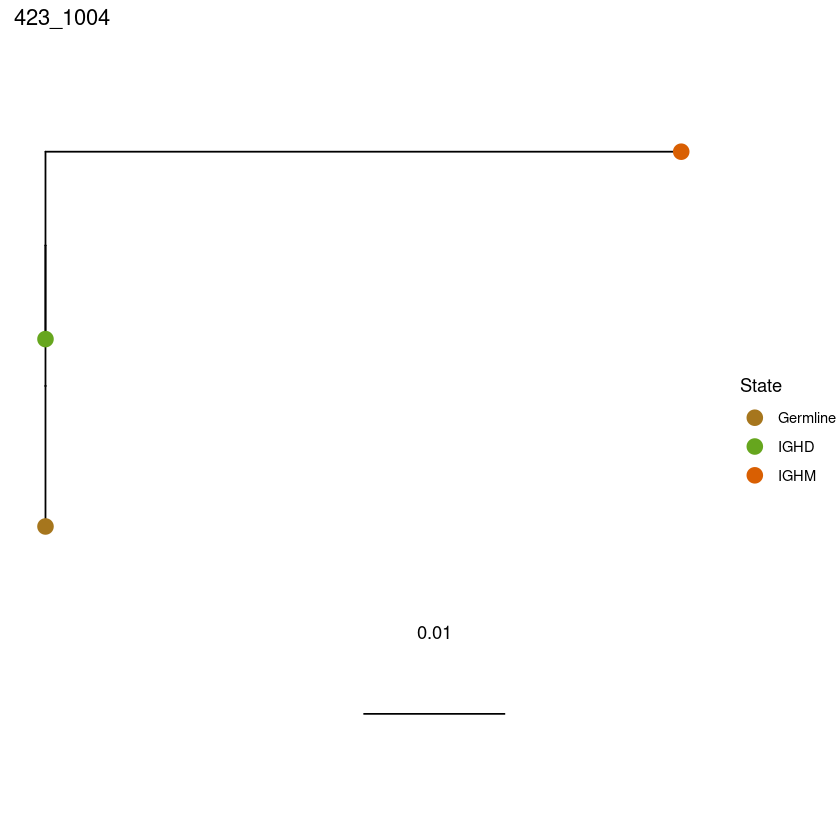

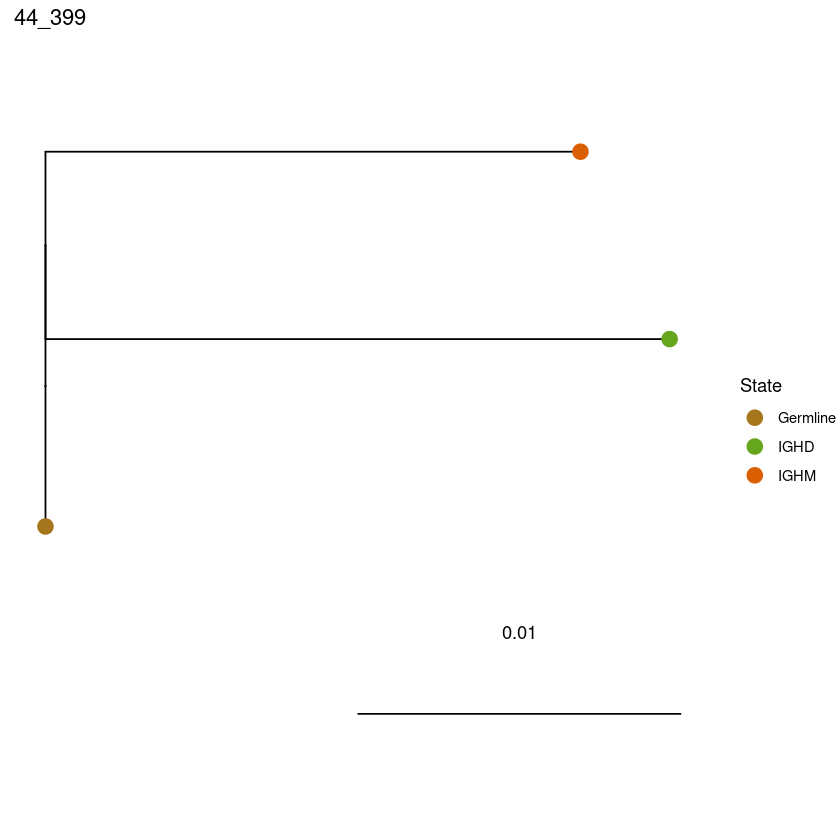

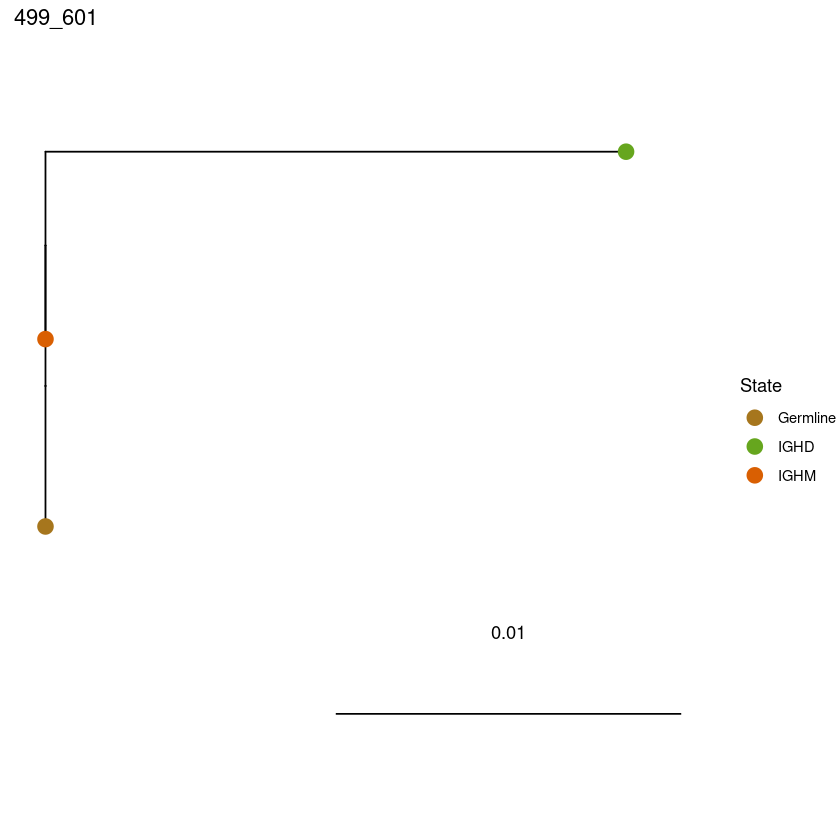

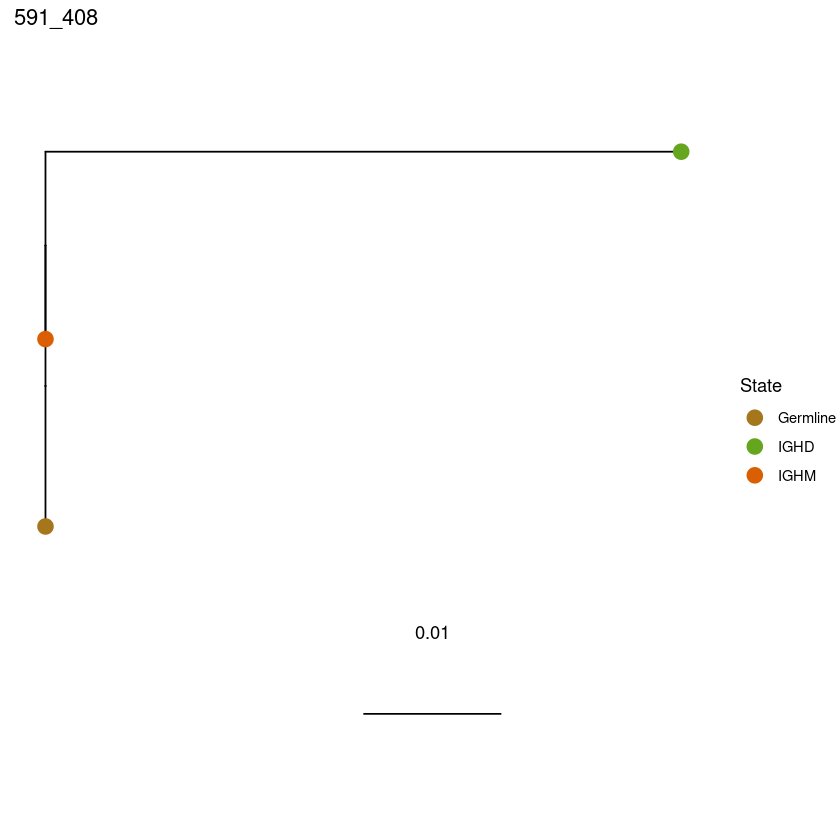

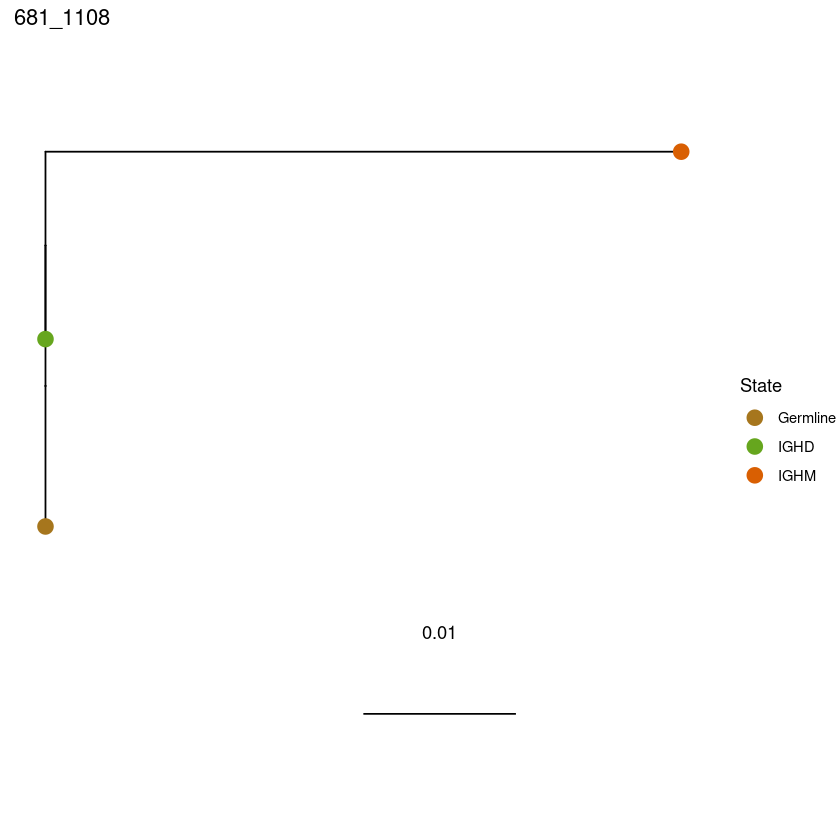

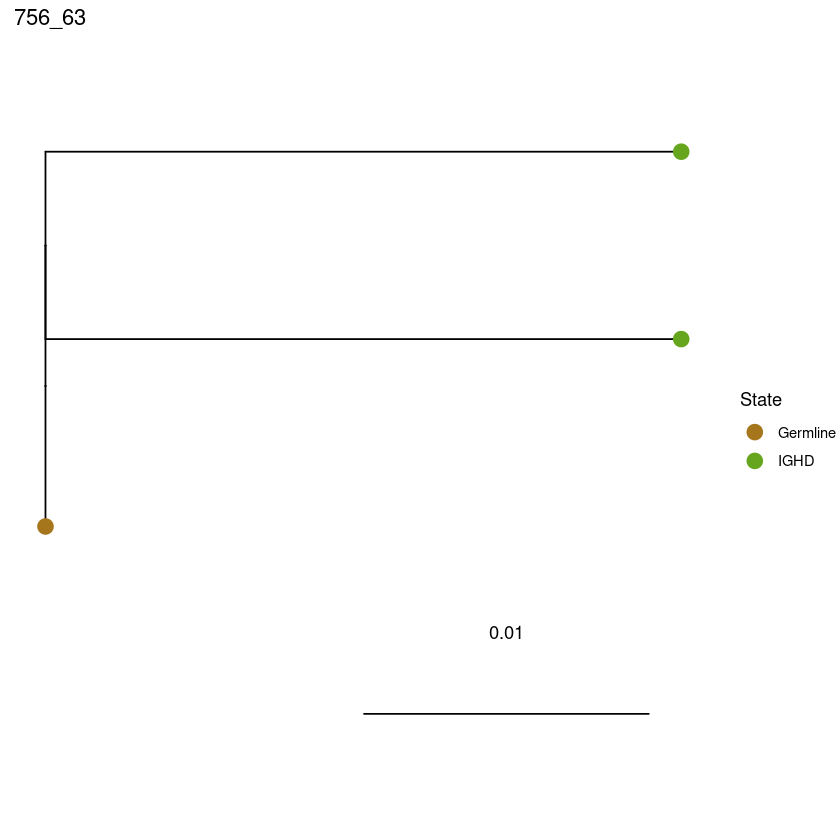

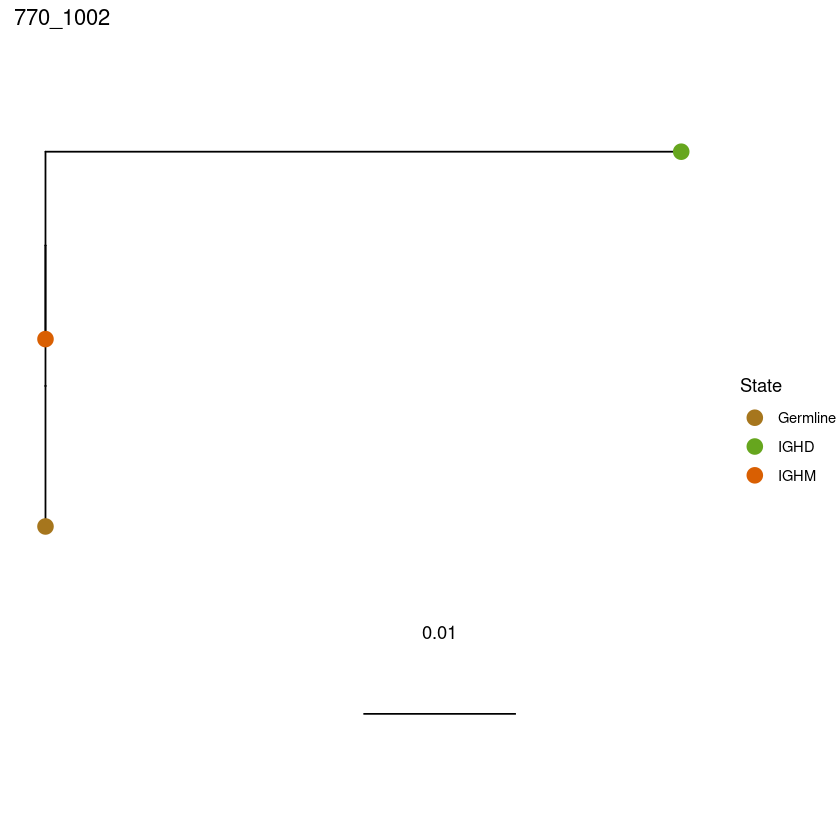

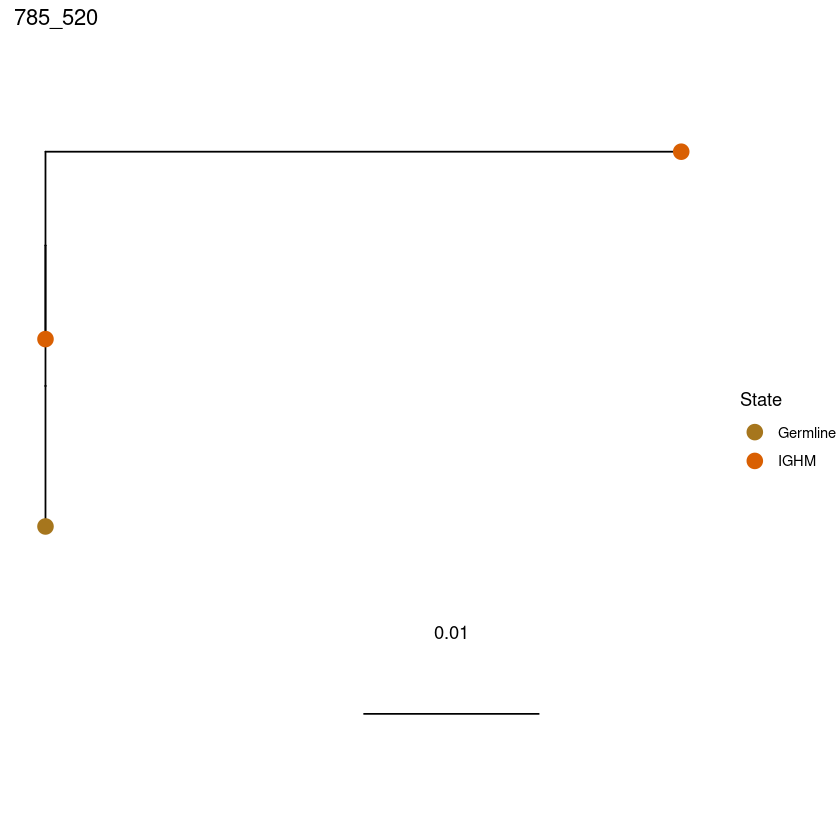

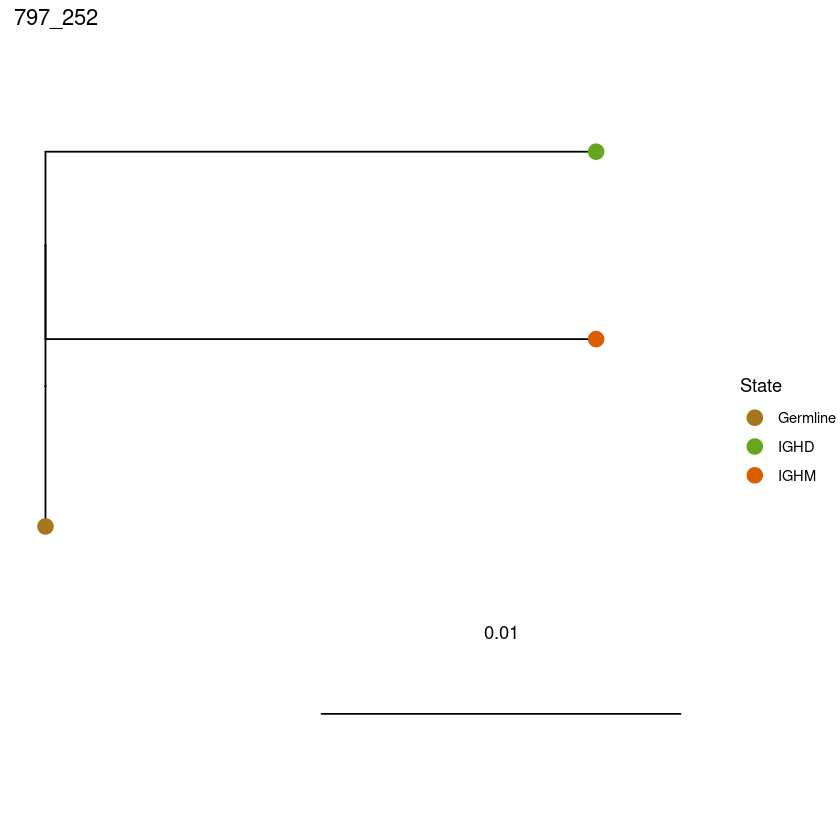

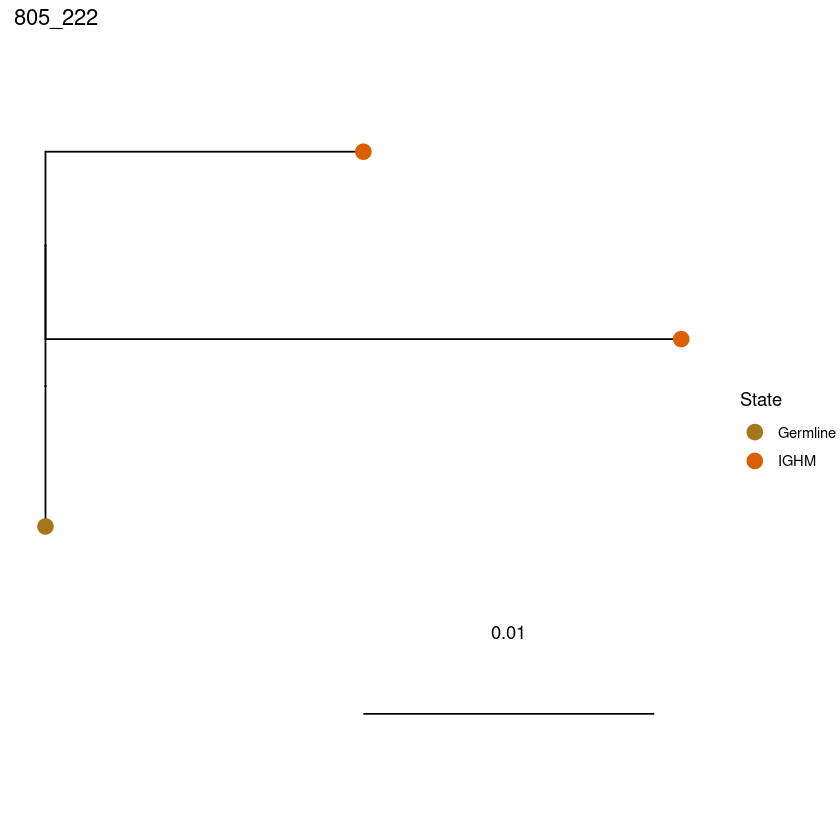

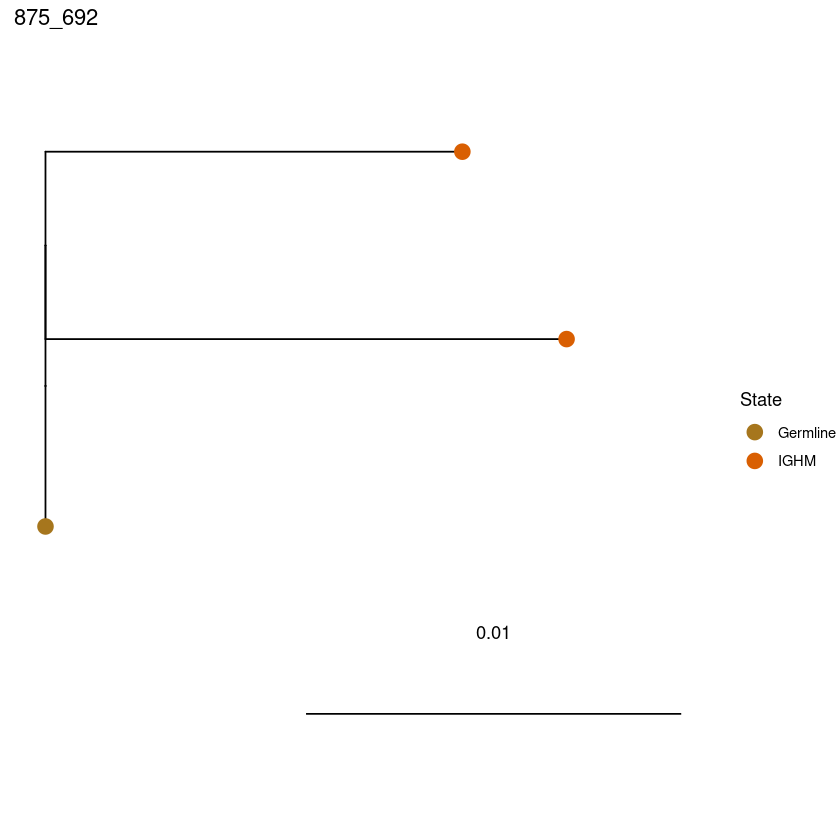

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]

[[31]]

[[32]]

[[33]]

[[34]]

[[35]]

[[36]]

[[37]]


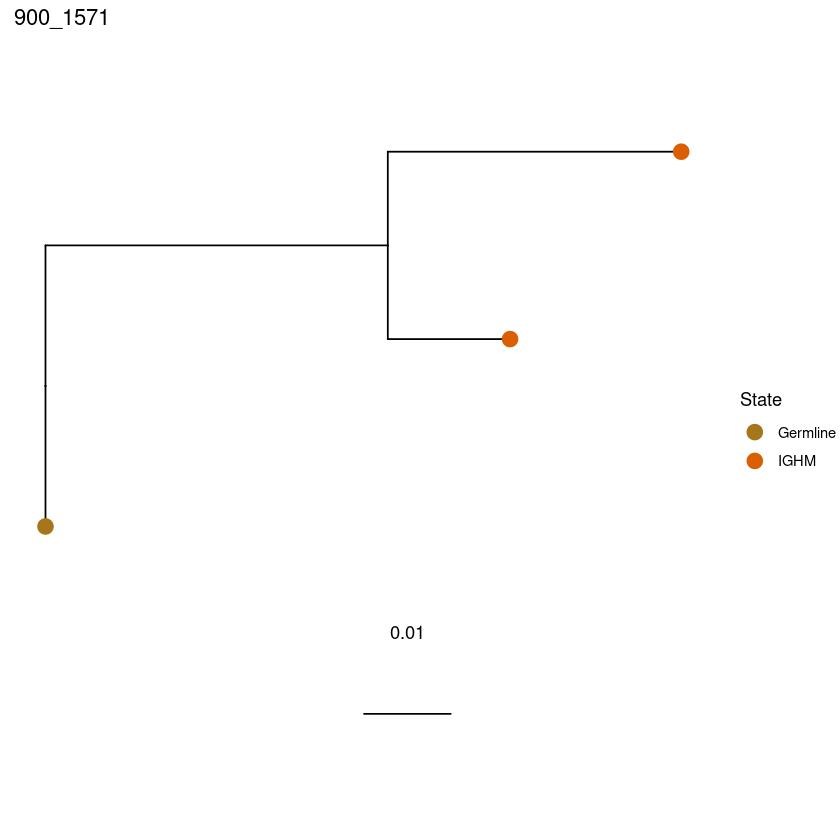

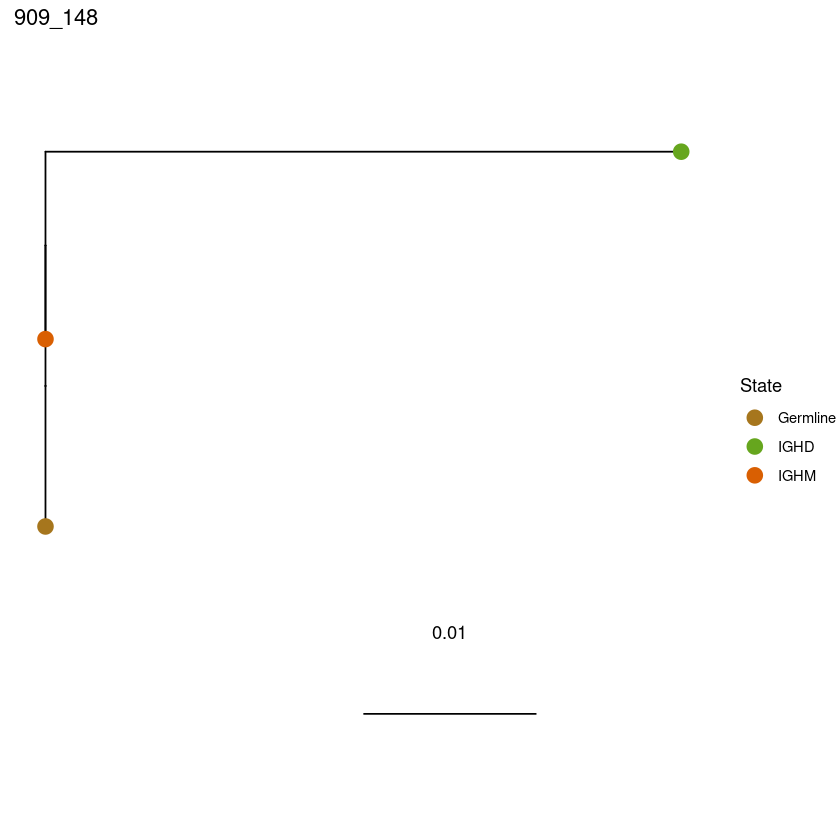

In [13]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

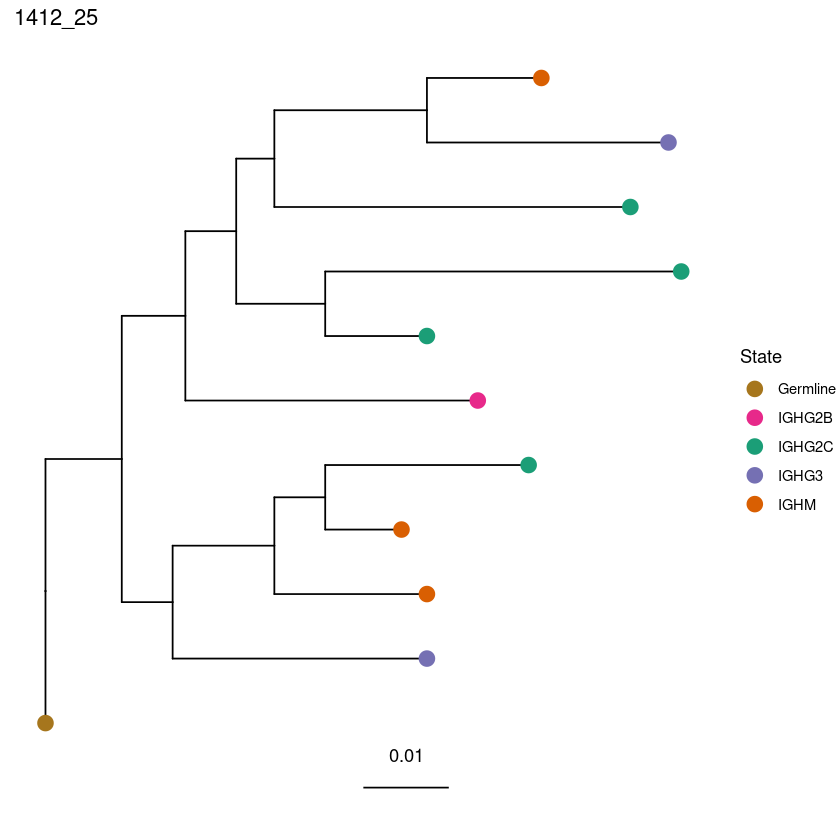

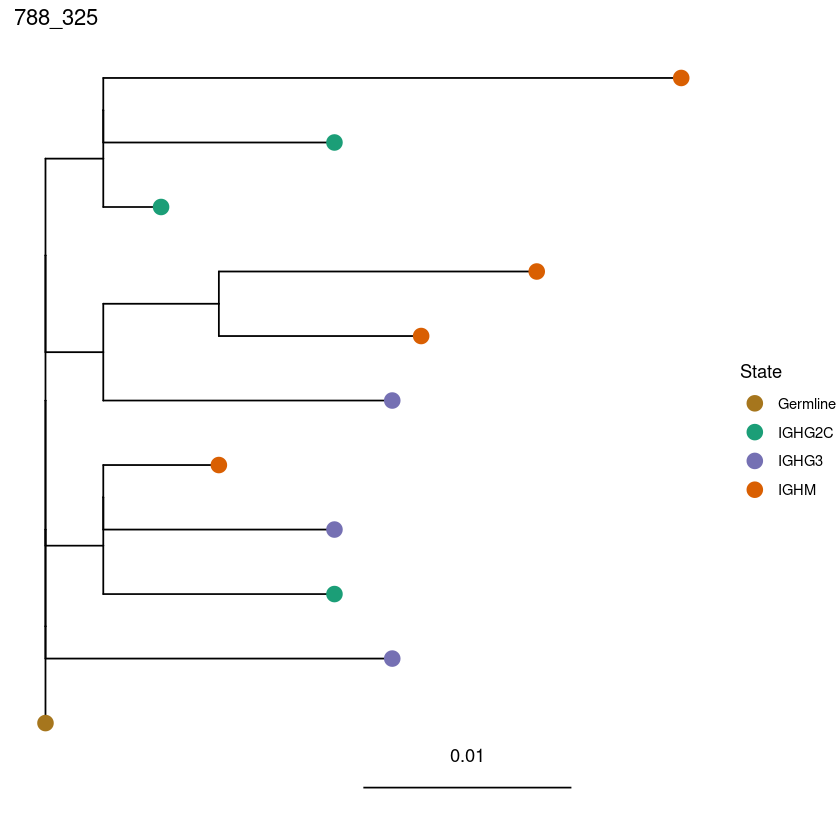

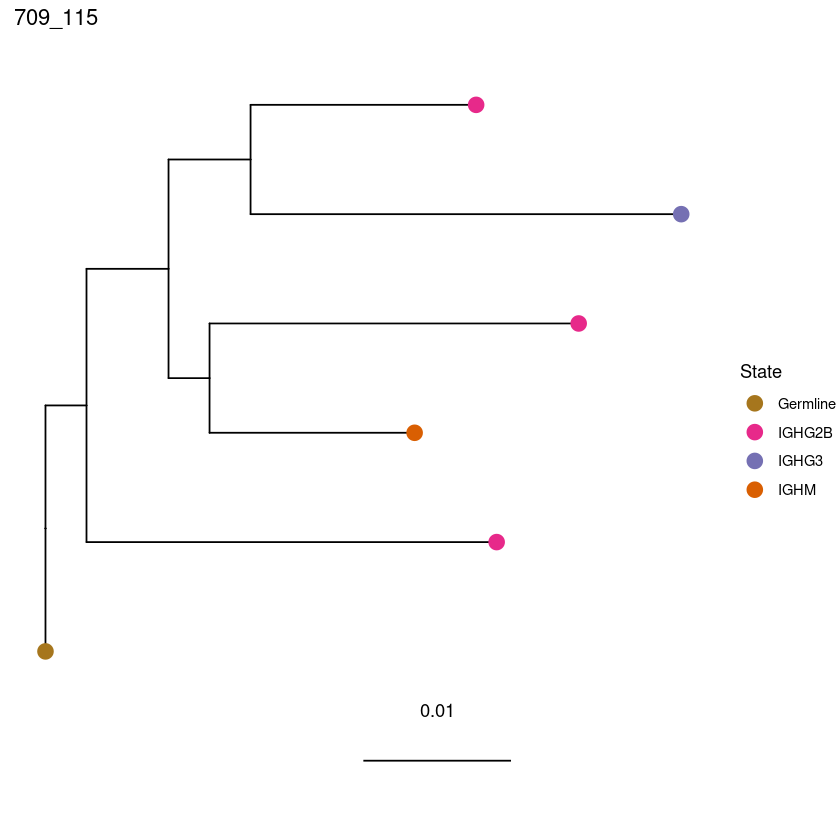

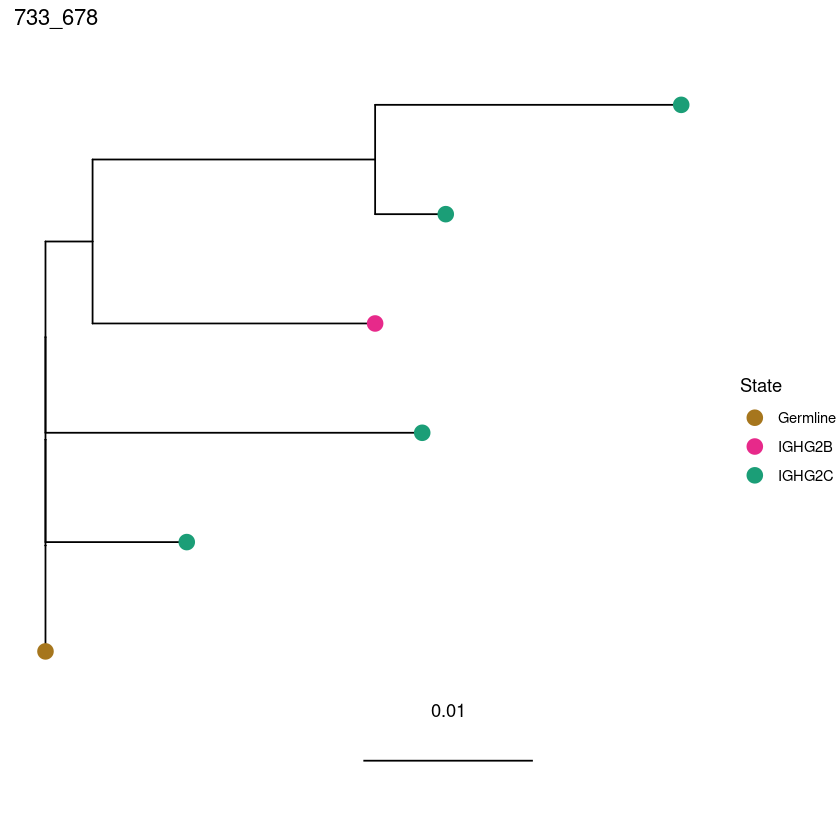

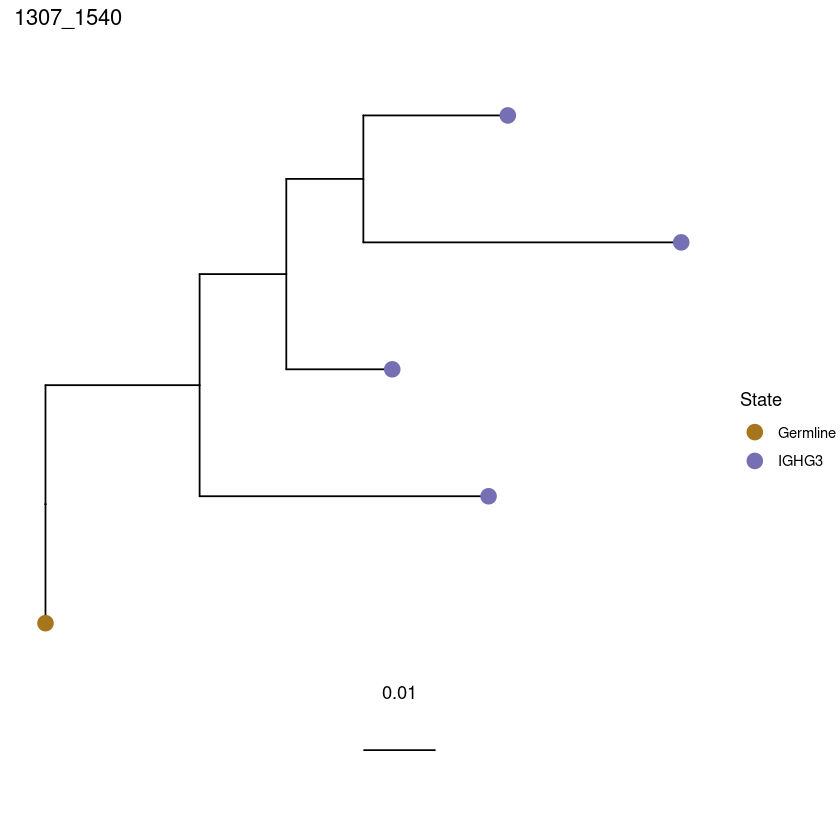

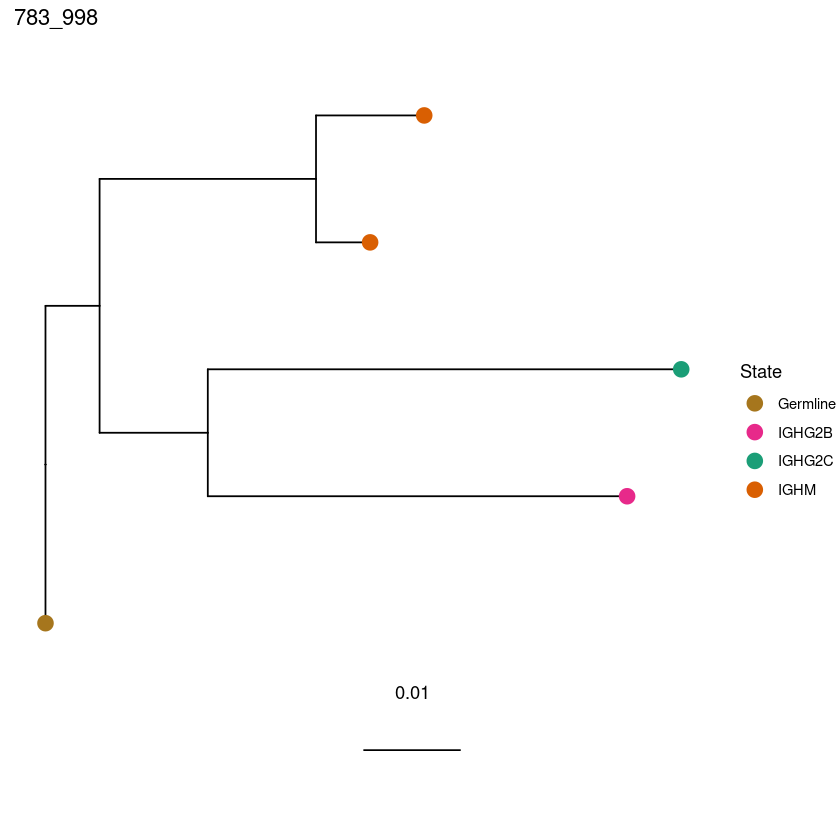

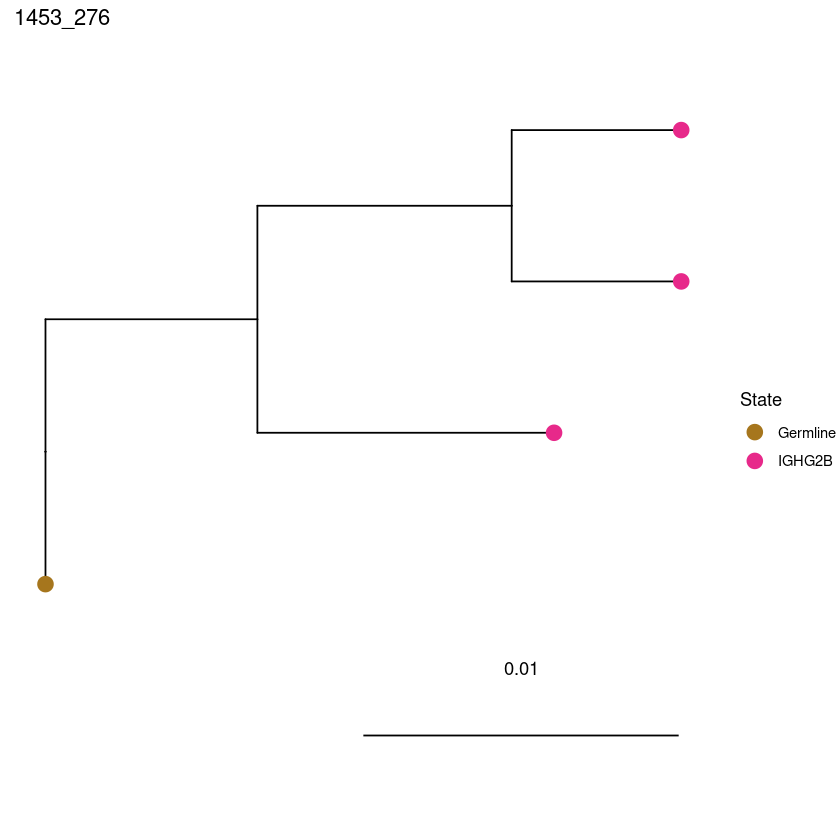

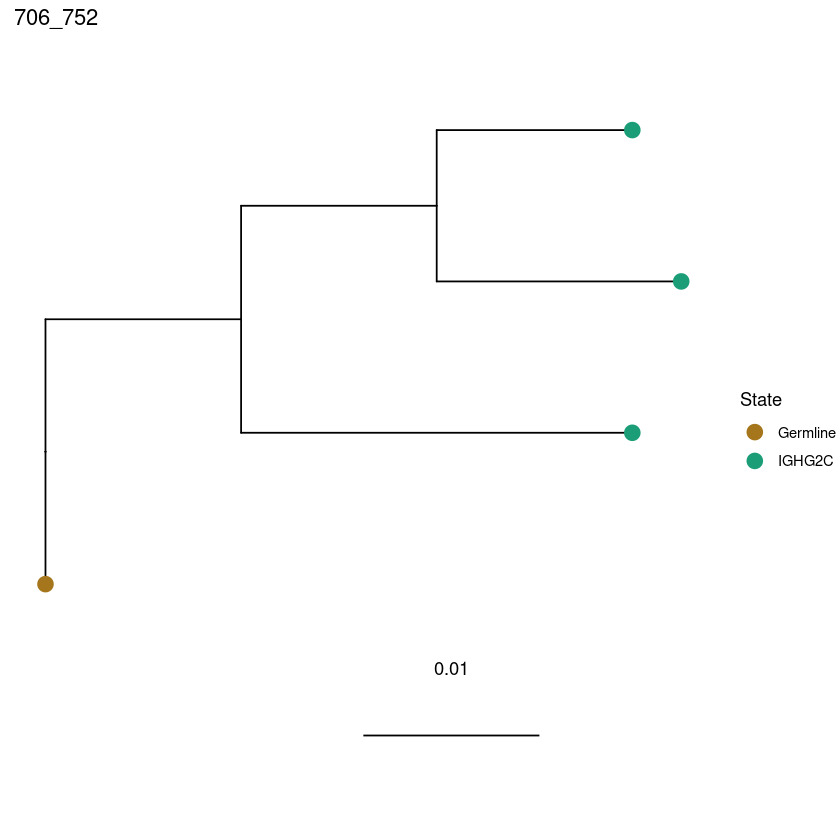

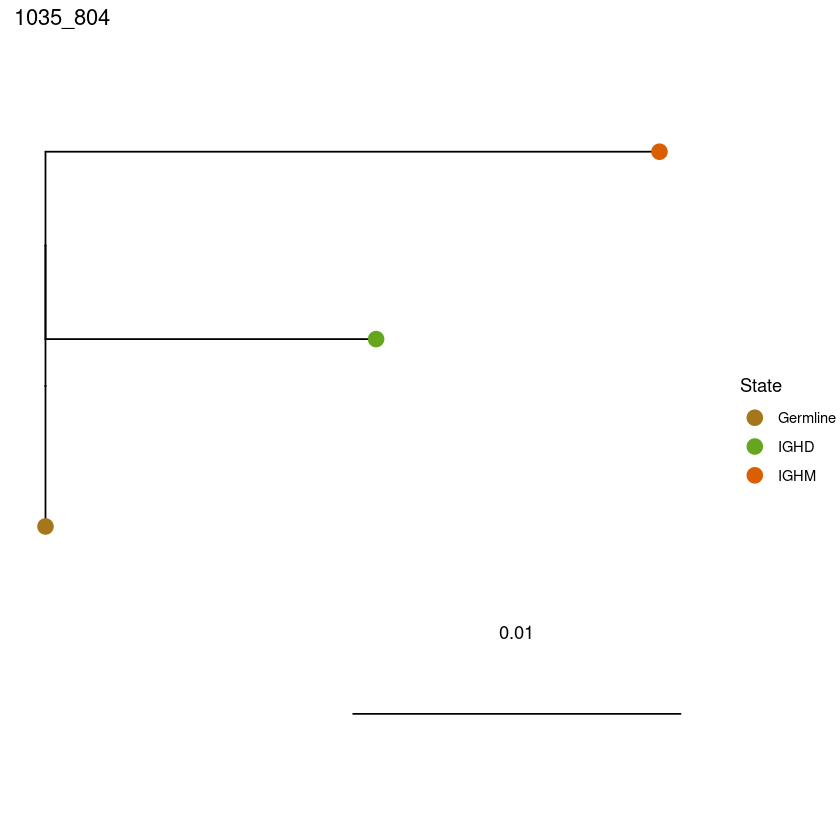

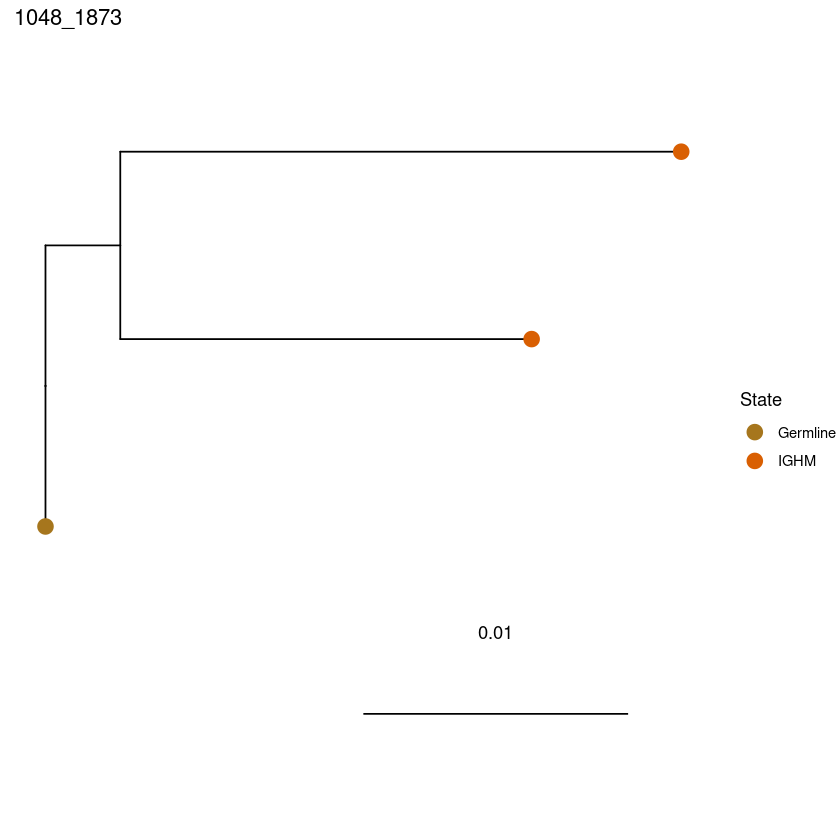

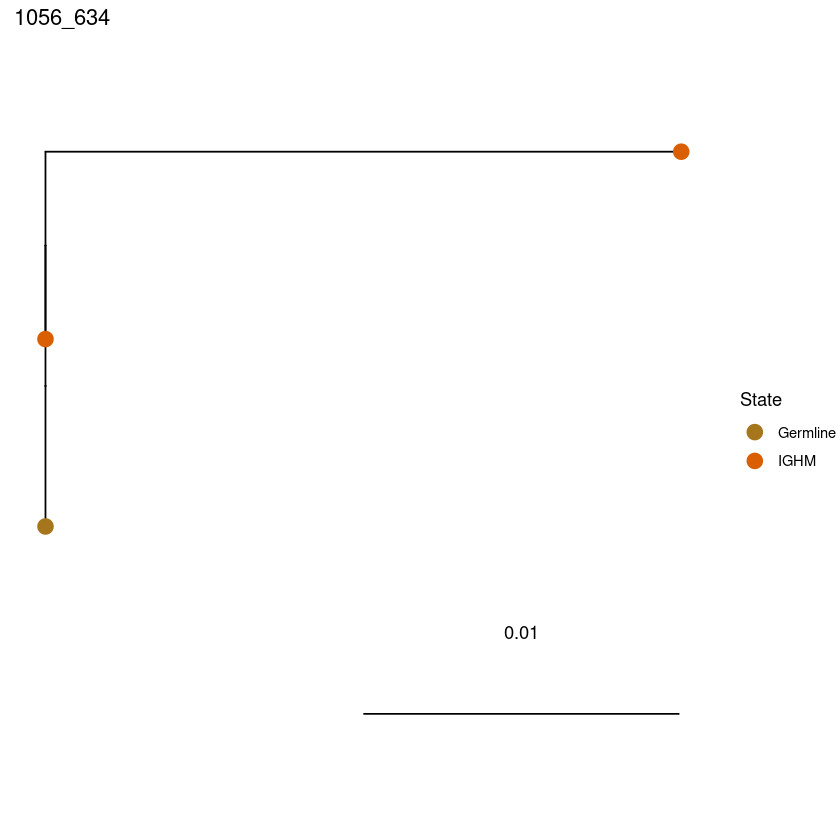

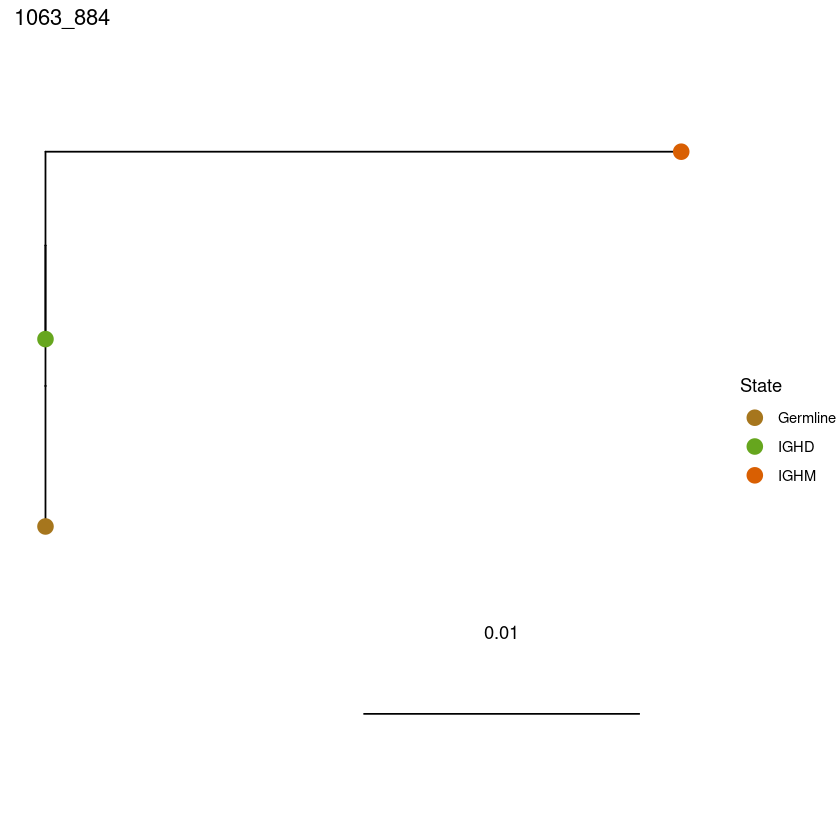

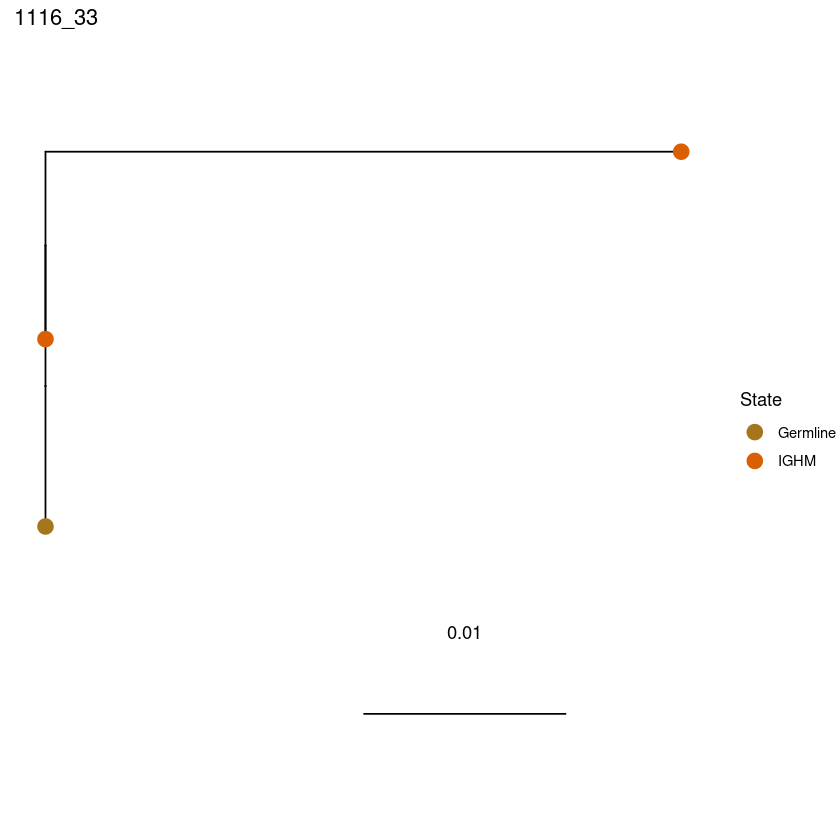

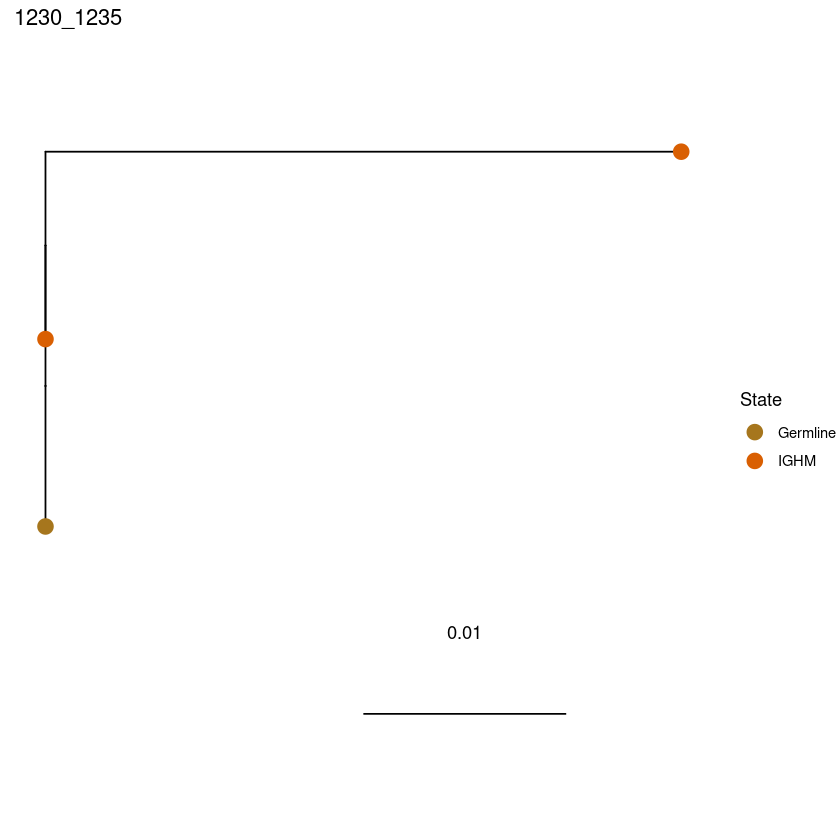

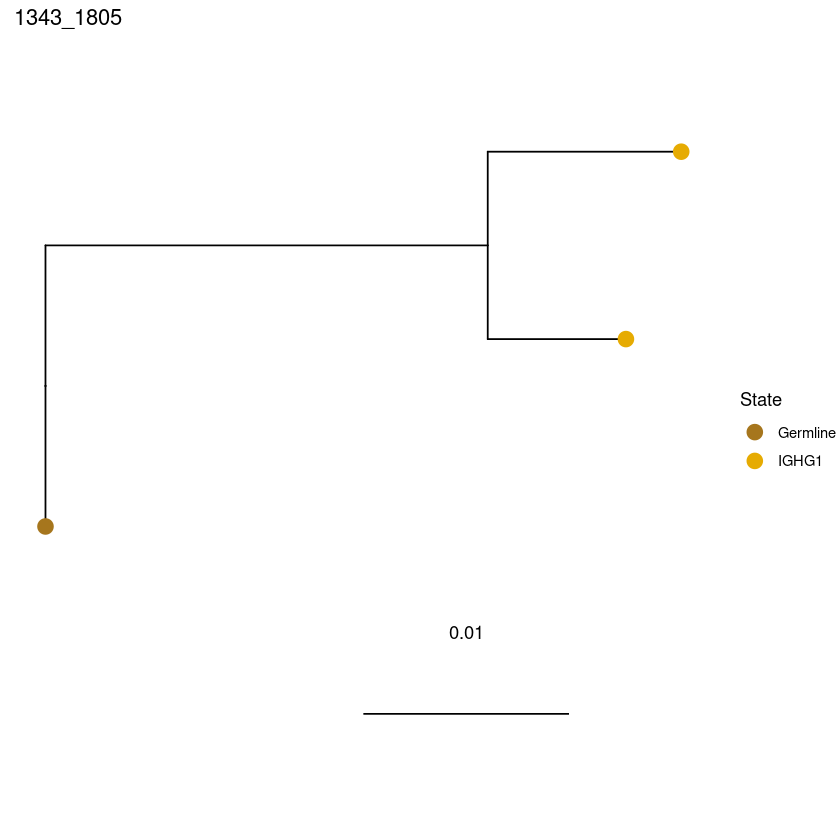

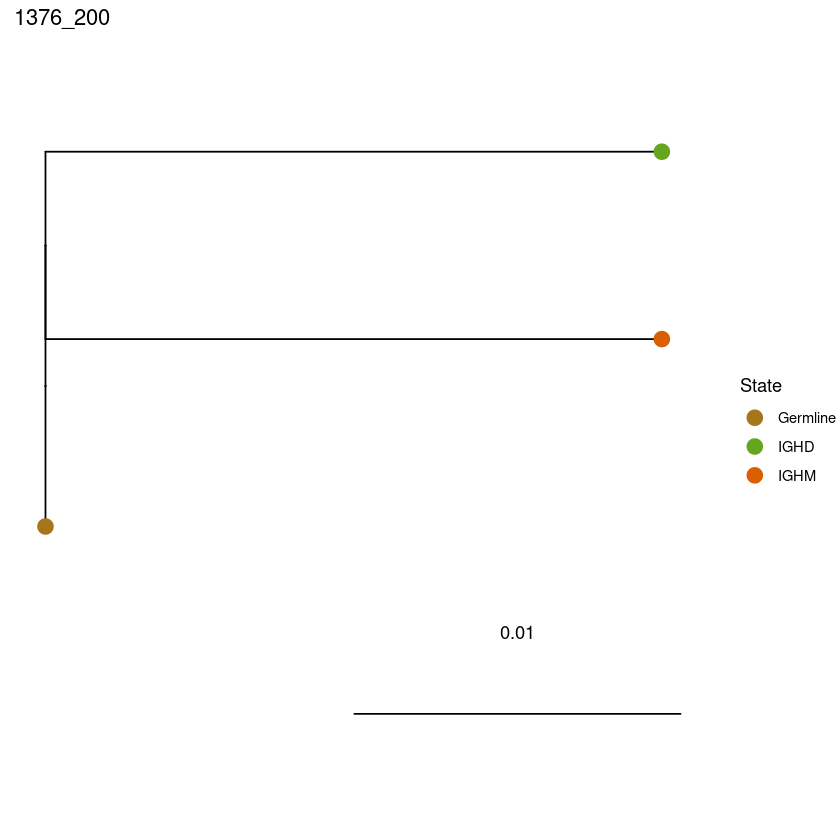

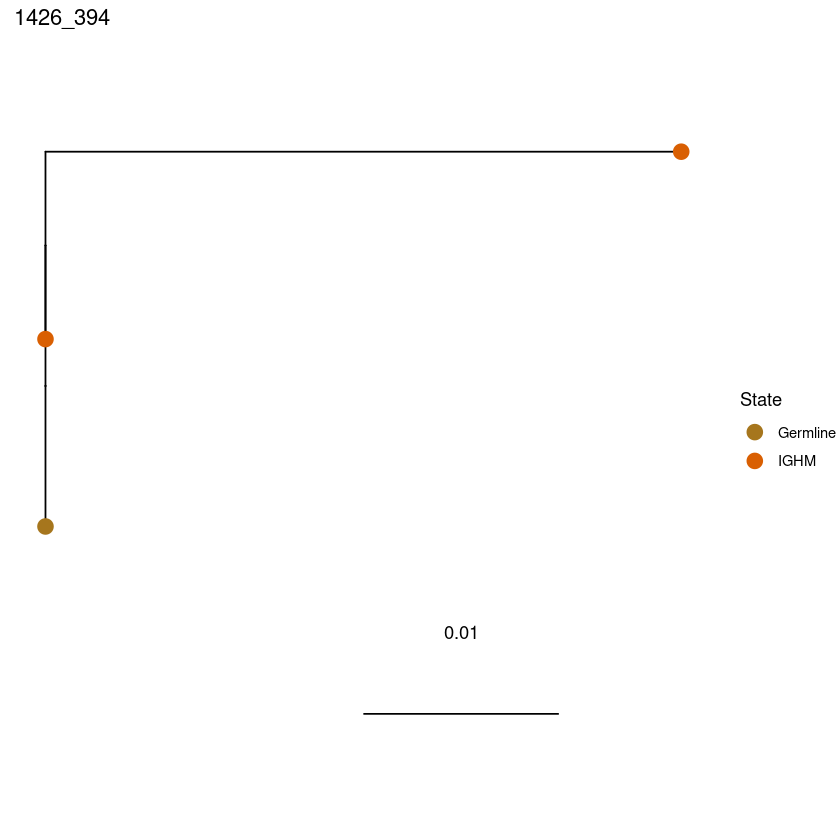

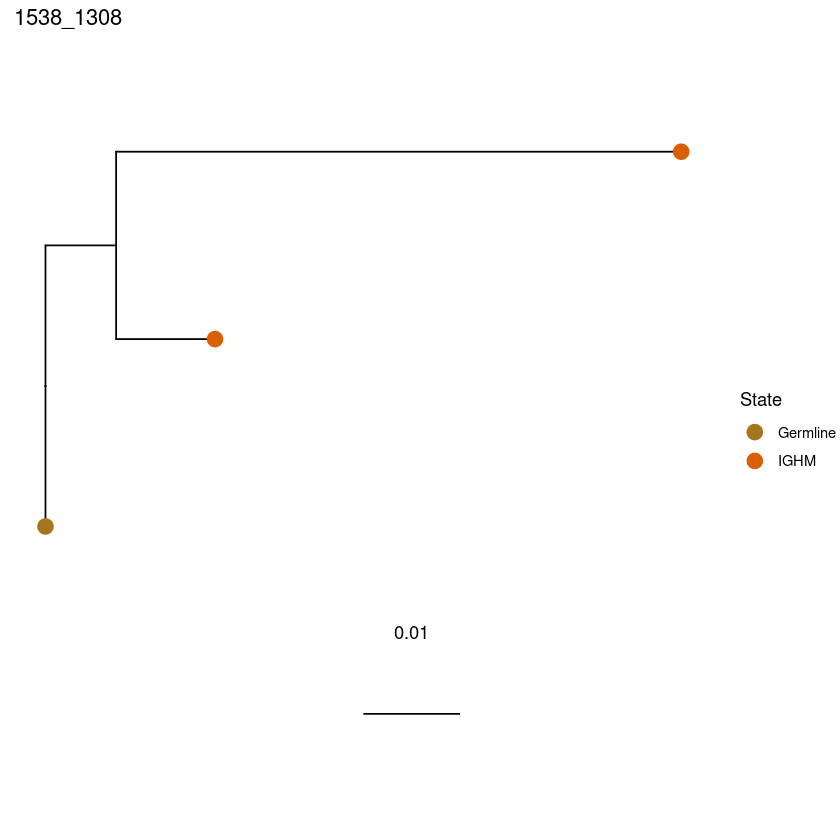

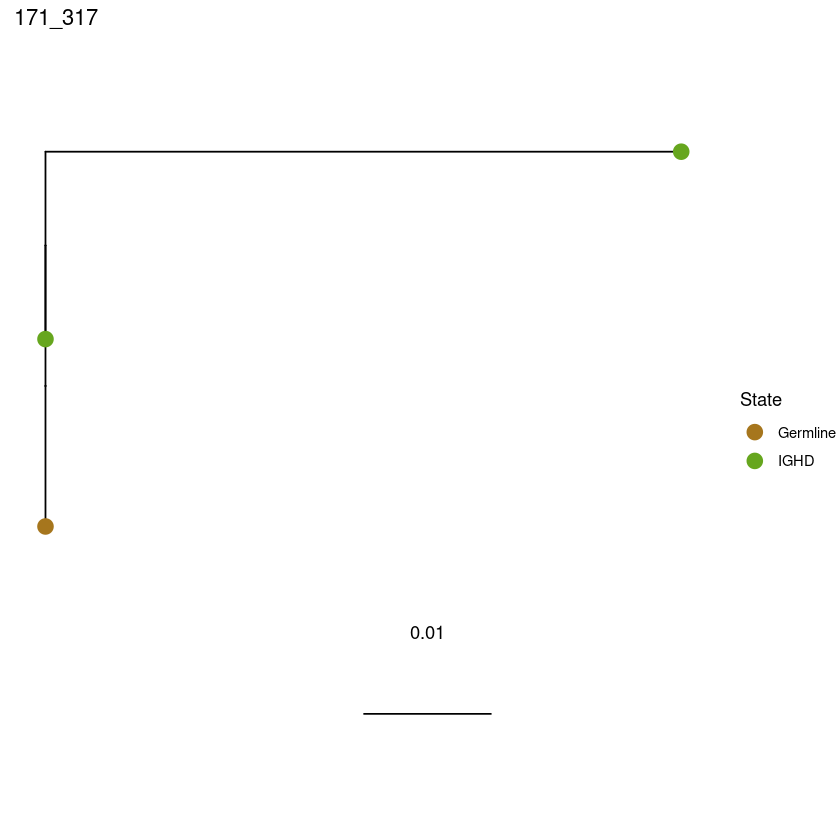

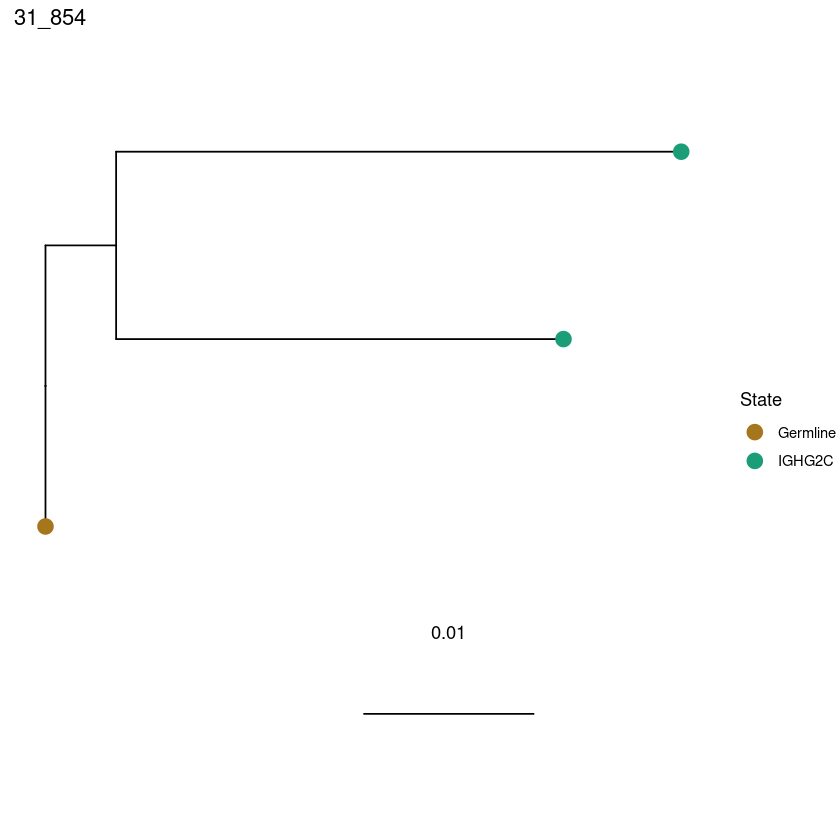

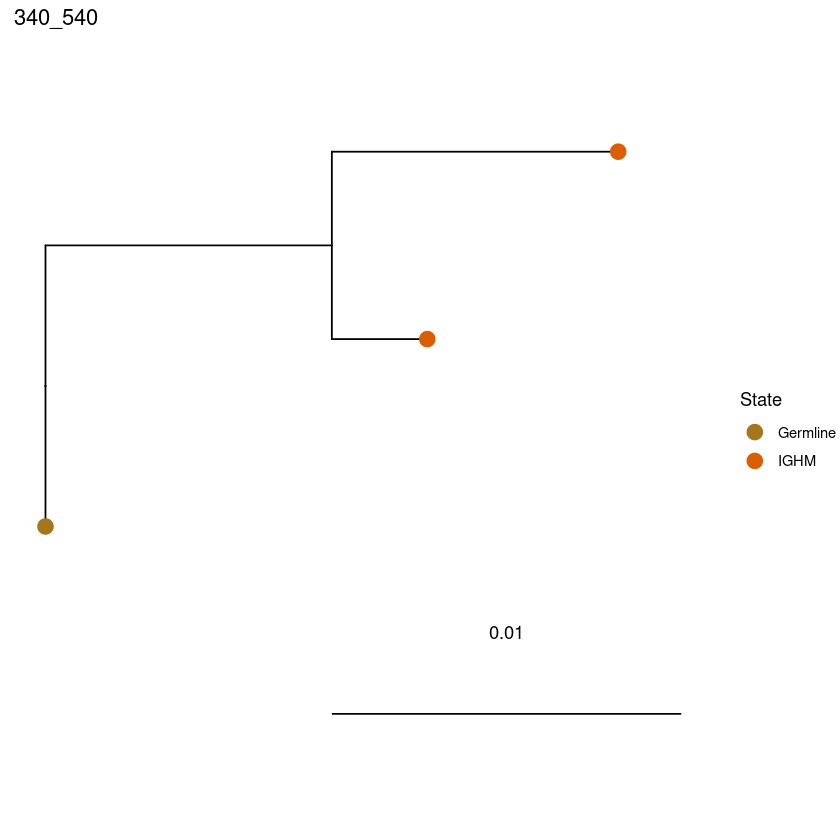

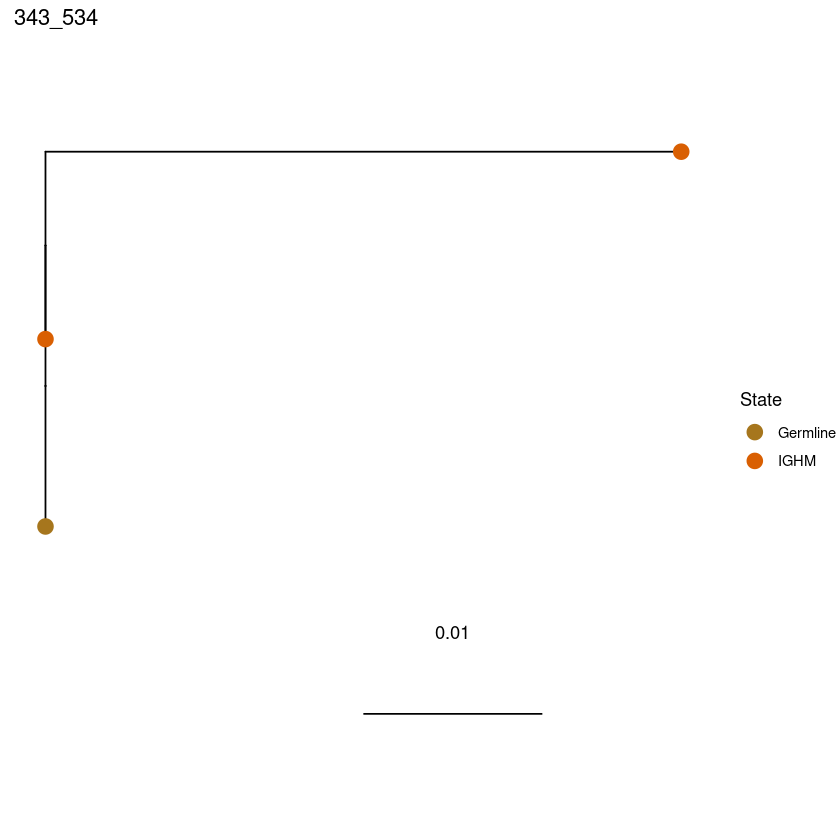

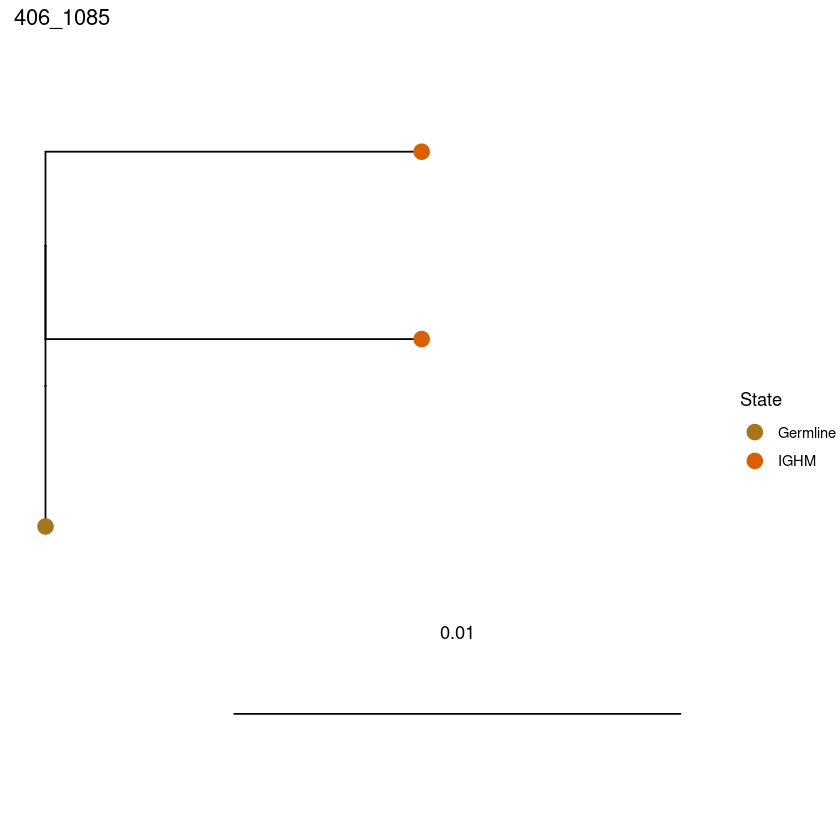

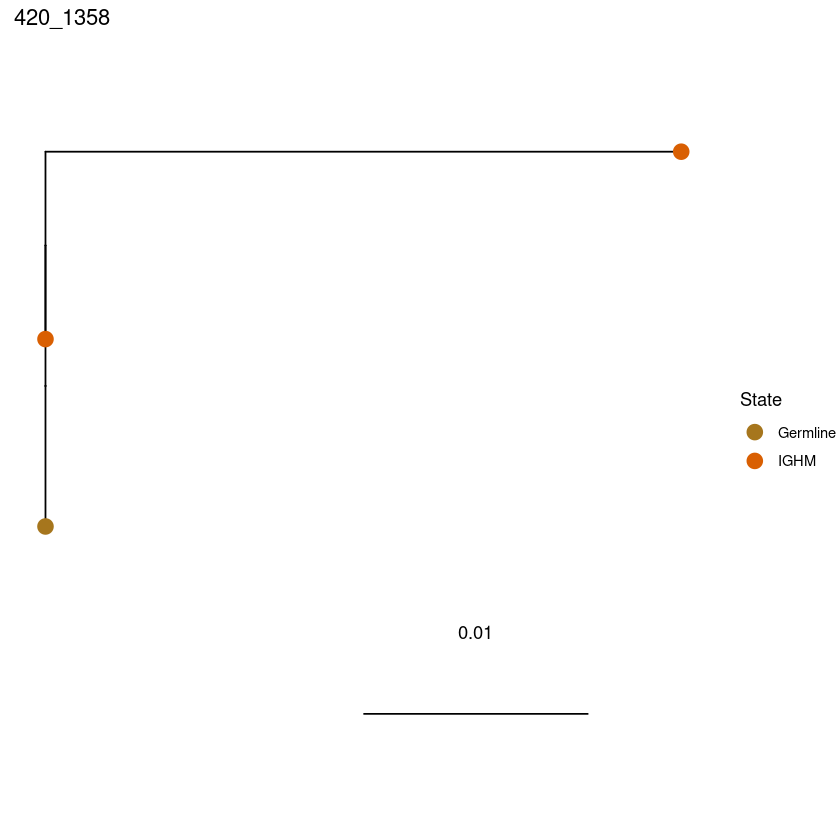

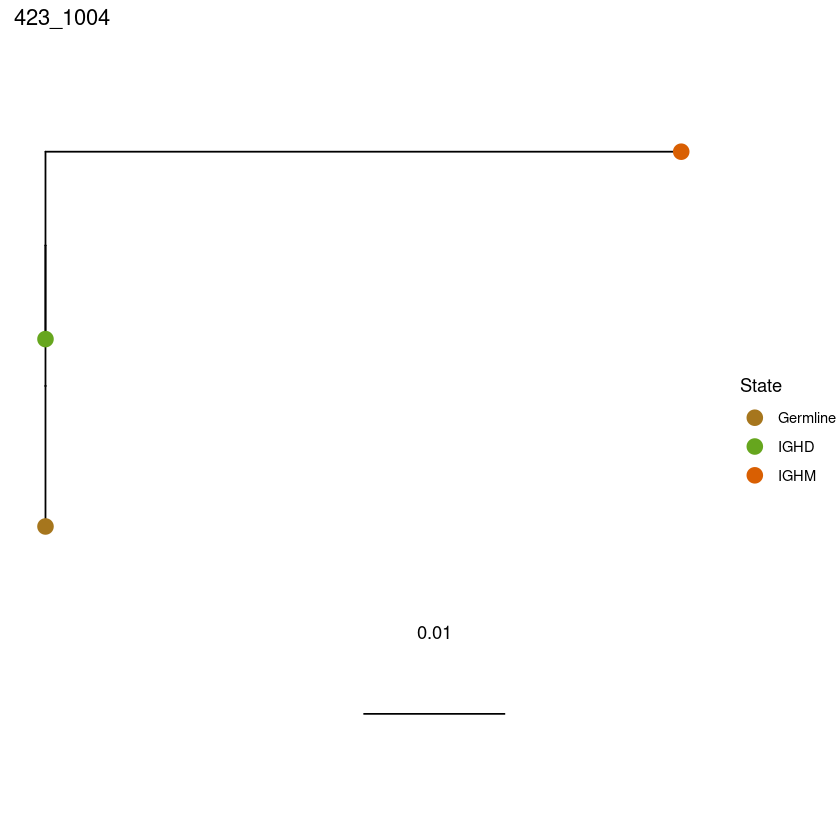

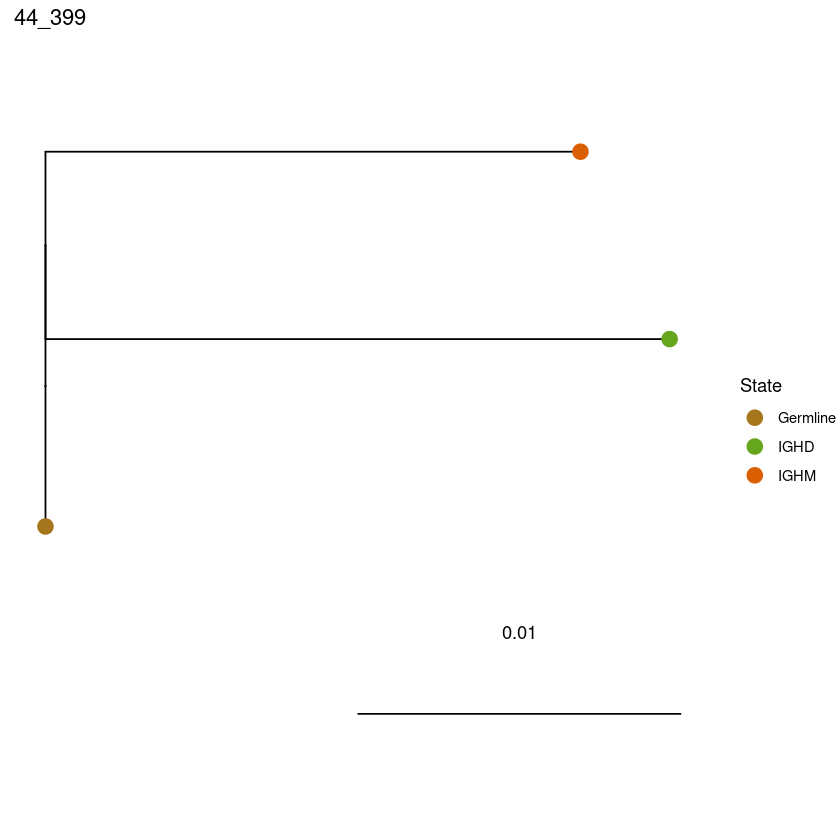

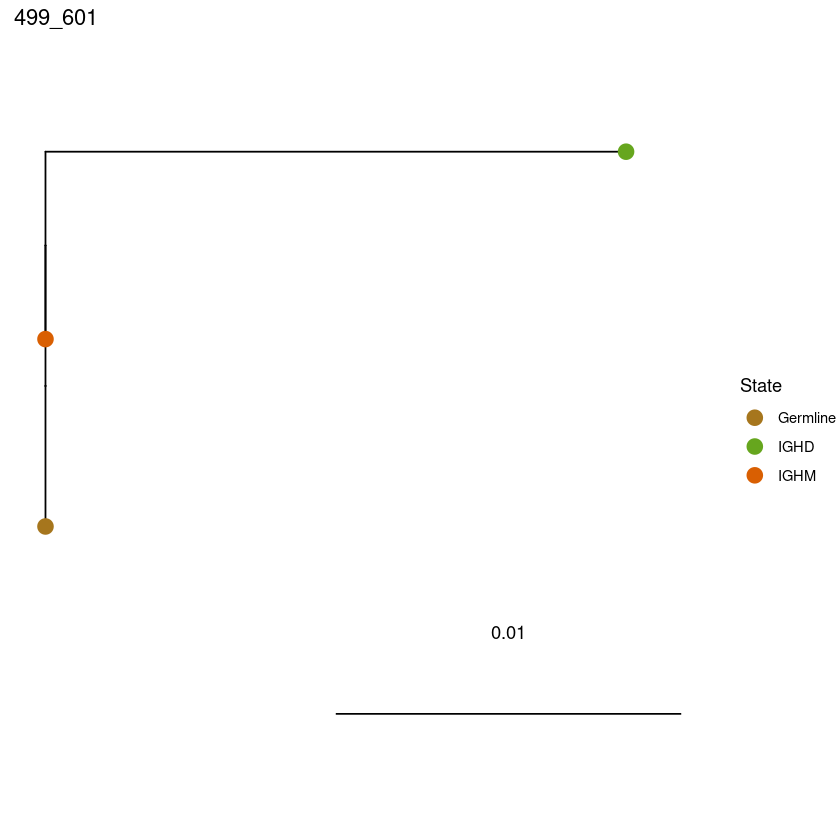

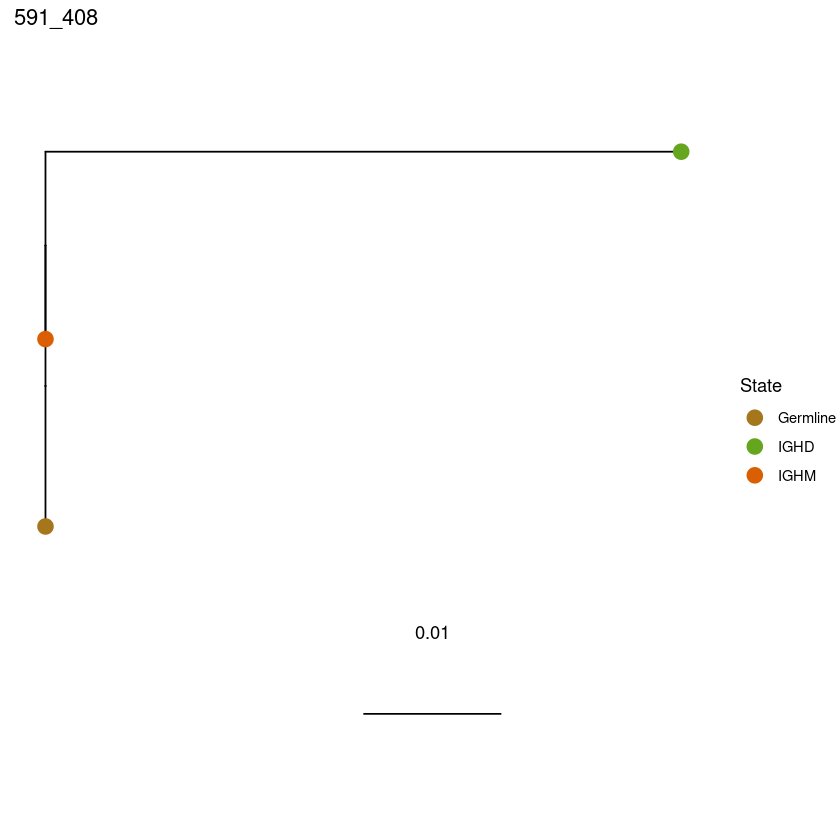

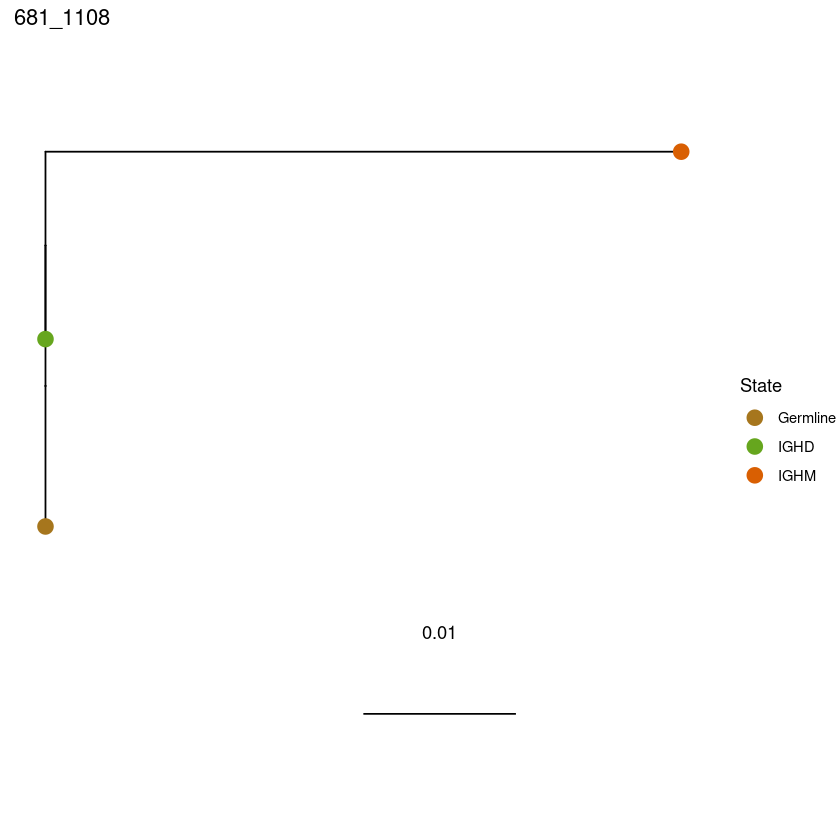

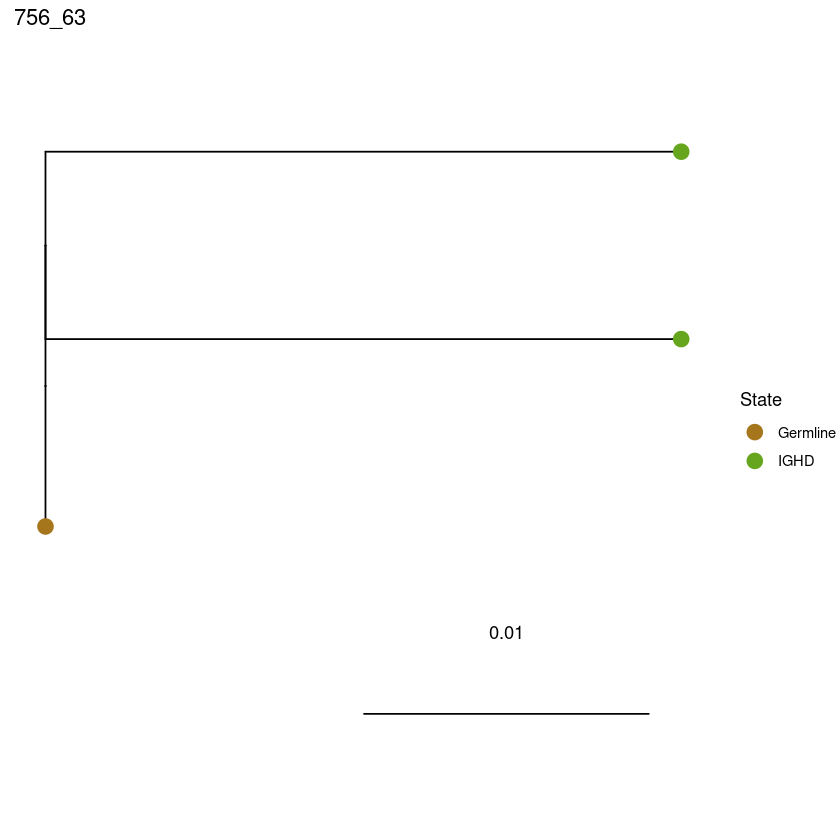

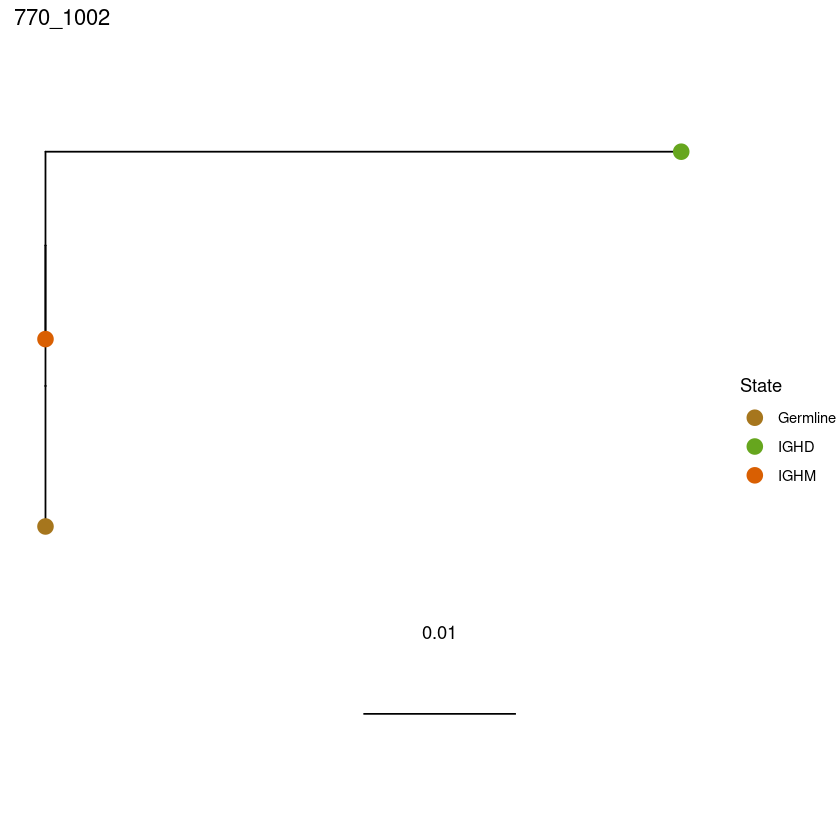

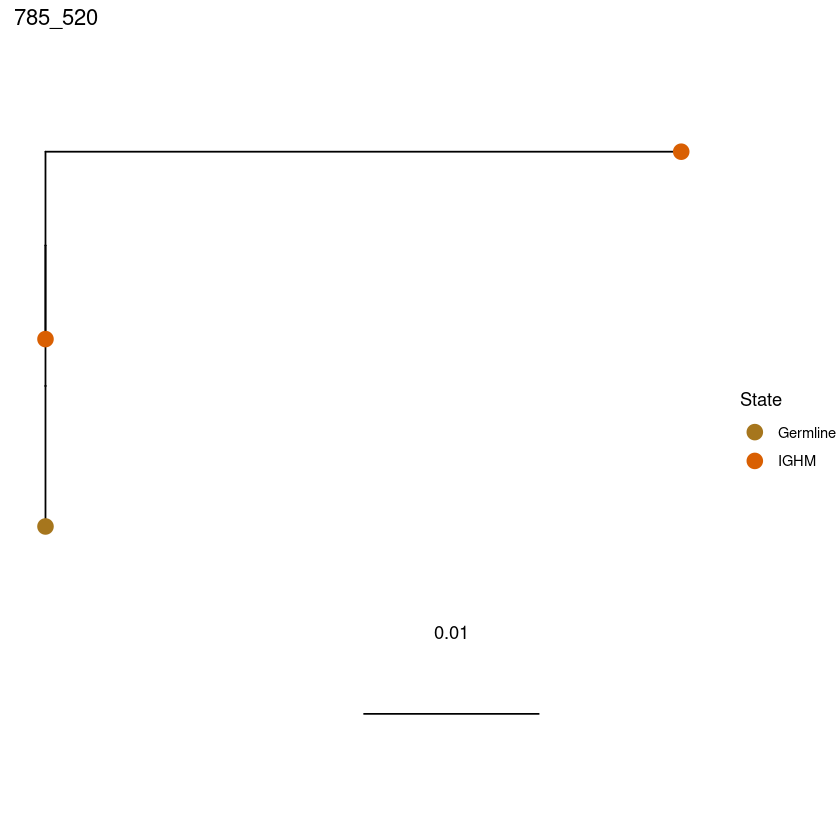

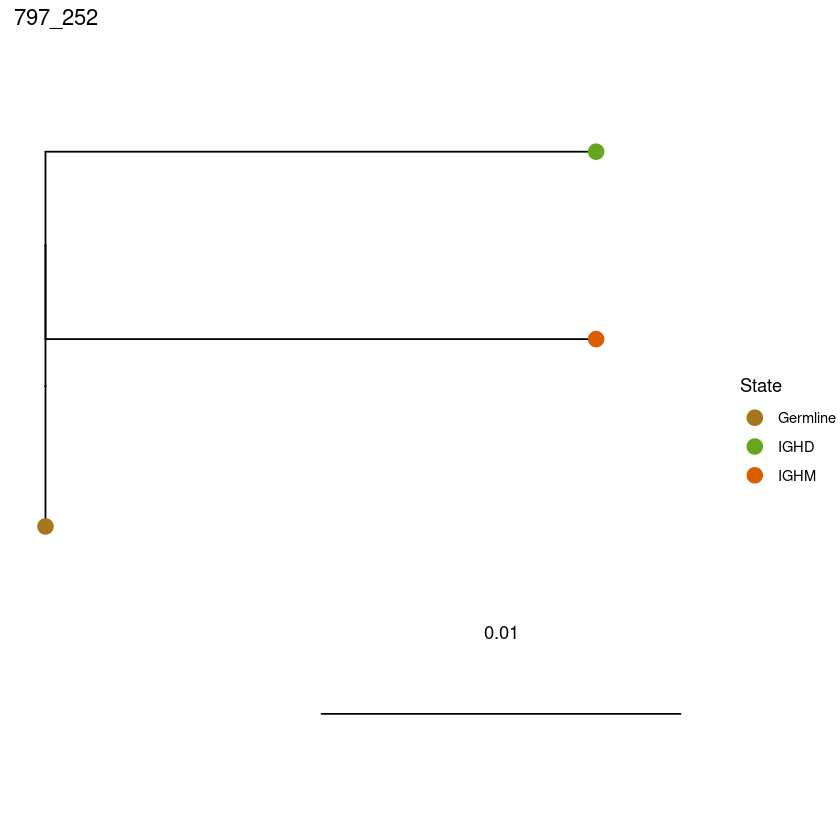

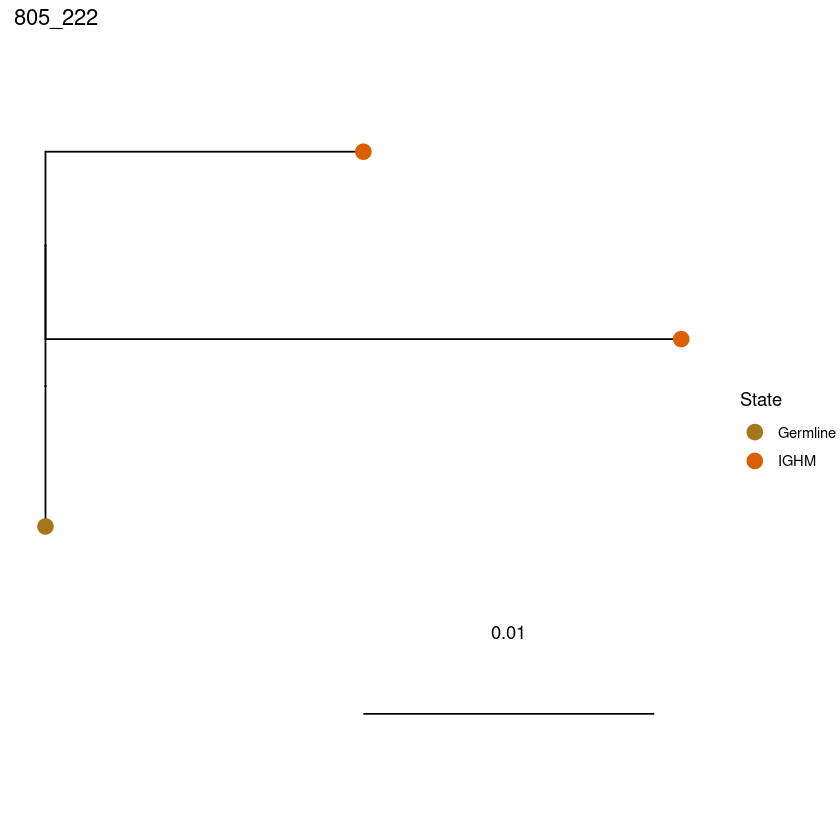

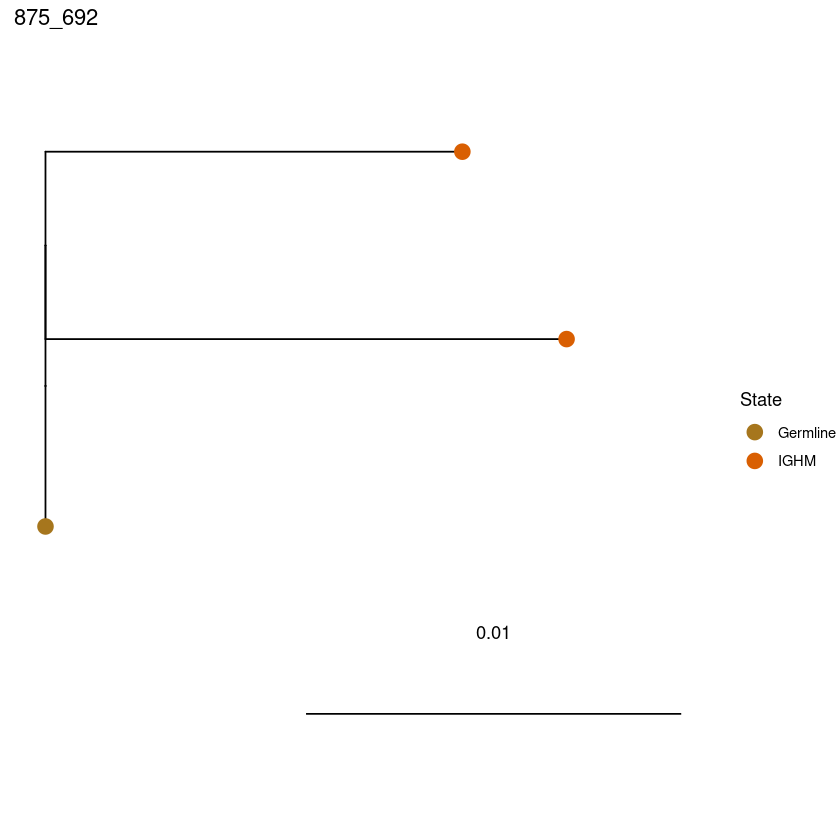

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]

[[23]]

[[24]]

[[25]]

[[26]]

[[27]]

[[28]]

[[29]]

[[30]]

[[31]]

[[32]]

[[33]]

[[34]]

[[35]]

[[36]]

[[37]]


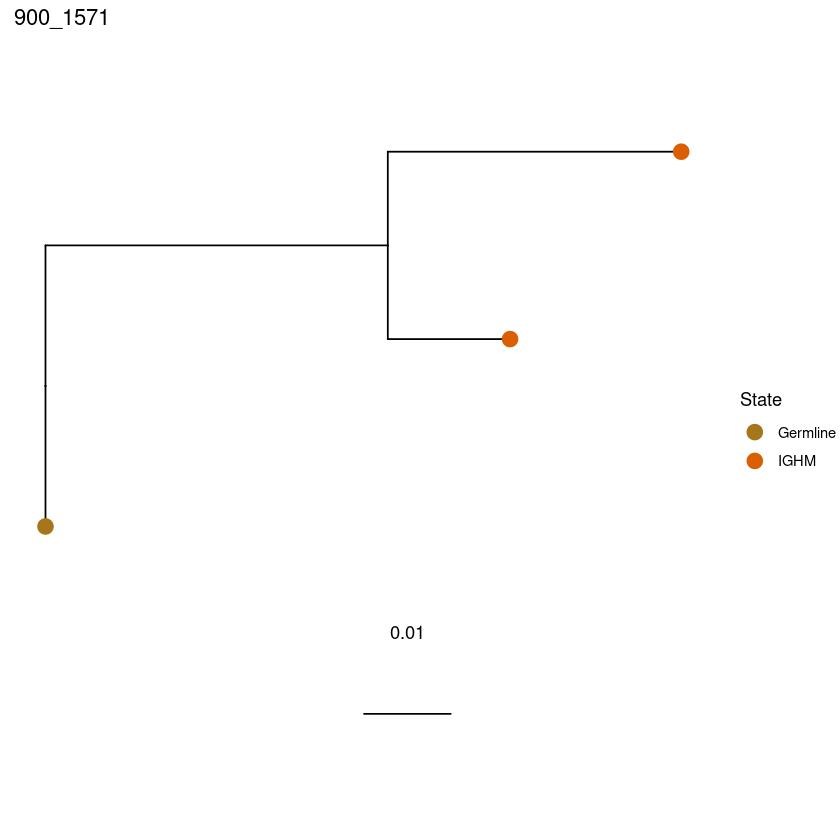

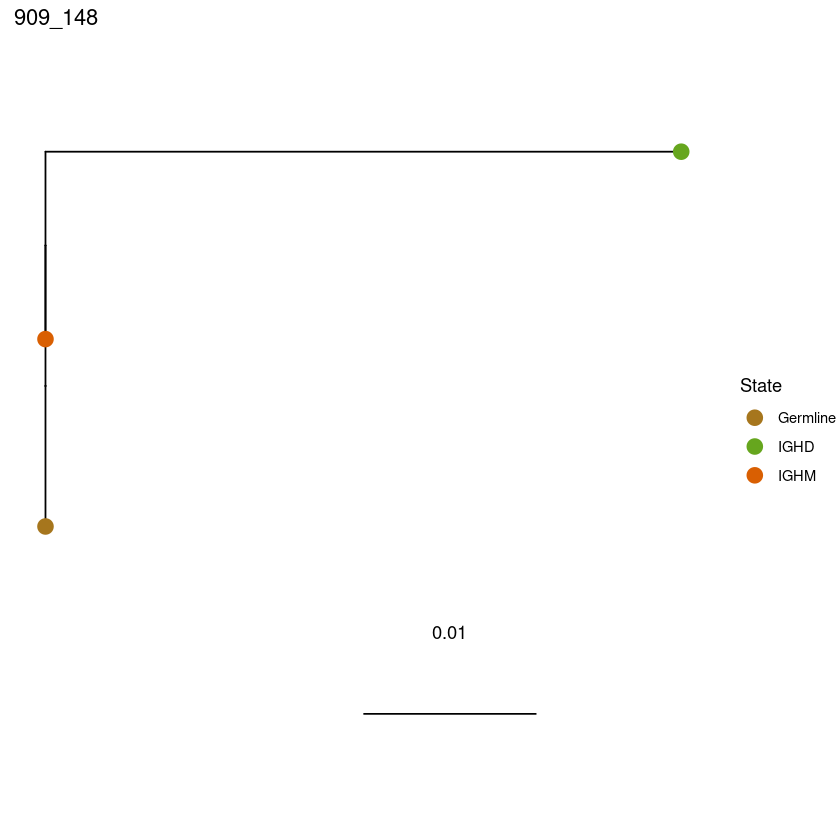

In [26]:
# simple tree plotting with ggtree R package with isotypes at tips
plotTrees(trees, tips="c_call", tipsize = 4, 
          scale = 0.01,
          node_palette = "Dark2",
          title = TRUE,
          )

In [14]:
# Build trees using dnapars.
# exec here is set to dnapars position in the Docker image.
clones = getTrees(clones, build="igphyml", 
    exec="/usr/local/share/igphyml/src/igphyml", nproc=16)

Warning message in buildIgphyml(data, igphyml = exec, temp_path = file.path(dir, :
“Dowser igphyml doesn't mask split codons!”


In [41]:
print(clones)

clones$parameters[[1]]$omega_mle

# A tibble: 37 x 4
   clone_id  data       locus  seqs
   <chr>     <list>     <chr> <int>
 1 1412_25   <airrClon> IGH      10
 2 788_325   <airrClon> IGH      10
 3 709_115   <airrClon> IGH       5
 4 733_678   <airrClon> IGH       5
 5 1307_1540 <airrClon> IGH       4
 6 783_998   <airrClon> IGH       4
 7 1453_276  <airrClon> IGH       3
 8 706_752   <airrClon> IGH       3
 9 1035_804  <airrClon> IGH       2
10 1048_1873 <airrClon> IGH       2
# … with 27 more rows


Warning message:
“Unknown or uninitialised column: `parameters`.”


NULL

In [42]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id  data                                                    locus seqs
1  1412_25   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   10  
2  788_325   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   10  
3  709_115   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    5  
4  733_678   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    5  
5  1307_1540 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    4  
6  783_998   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    4  
7  1453_276  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
8  706_752   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    3  
9  1035_804  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
10 1048_1873 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
11 1056_634  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
12 1063_884  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
13 1116_33   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
14 1230_1235 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
15 1343_1805 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
16 1376_200  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
17 1426_394  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
18 1538_1308 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
19 171_317   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
20 31_854    <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
21 340_540   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
22 343_534   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
23 406_1085  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
24 420_1358  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
25 423_1004  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
26 44_399    <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
27 499_601   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
28 591_408   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
29 681_1108  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
30 756_63    <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
31 770_1002  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
32 785_520   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
33 797_252   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
34 805_222   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
35 875_692   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
36 900_1571  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
37 909_148   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH    2  
   trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [43]:
trees <- collapseNodes(trees, tips = FALSE, check = TRUE)

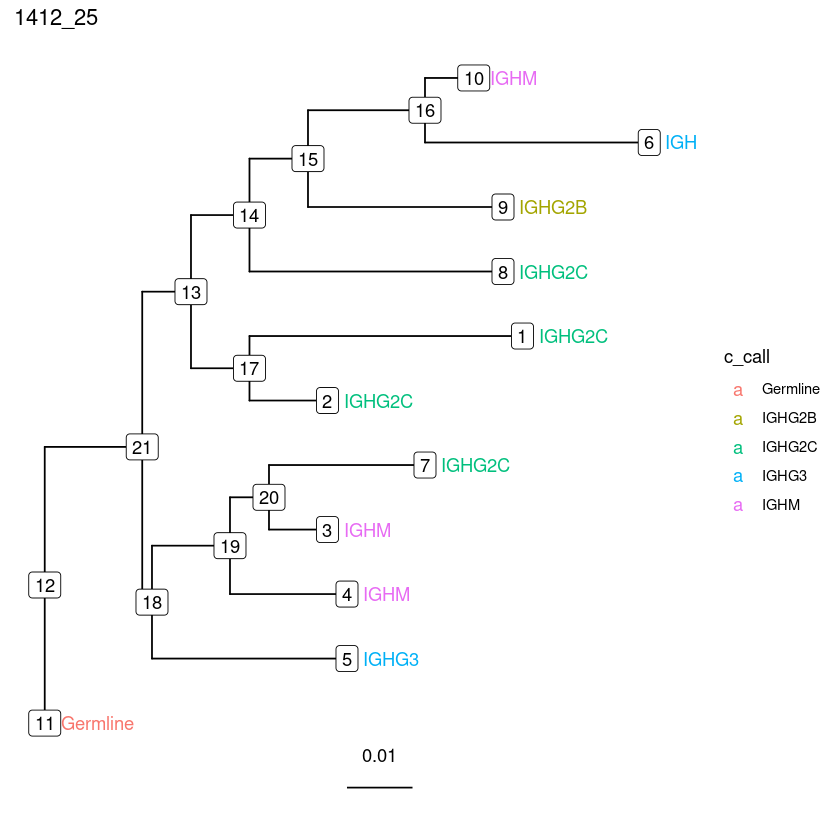

In [57]:
plotTrees(trees)[[1]] + geom_label(aes(label=node)) + geom_tiplab(aes(label=c_call, colour=c_call), offset=0.002)